<a href="https://colab.research.google.com/github/ernesmf23/Econometria_st/blob/main/BCRP_SERIES_DE_TIEMPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXTRACCIÓN, TRANSFORMACIÓN Y ANÁLISIS DE SERIES MACROECONÓMICAS DEL BCRP CON PYTHON**#

El presente trabajo tiene como objetivo automatizar la descarga, limpieza y análisis de series económicas oficiales del Banco Central de Reserva del Perú (BCRP), utilizando técnicas de web scraping en Python.
En particular, se emplean herramientas del ecosistema pandas, requests y BeautifulSoup para extraer series históricas como el Producto Bruto Interno (PBI), la inflación y la tasa de interés en MN, su versión desestacionalizada, variable claves del desempeño macroeconómico del país.


Este enfoque permite replicar, actualizar y analizar en tiempo real indicadores económicos directamente desde la fuente oficial sin necesidad de cargar archivos manualmente ni usar interfaces gráficas.
El trabajo también busca sentar las bases para una exploración más profunda de las relaciones entre inflación, crecimiento y tasas de interés en el Perú, elementos fundamentales para el análisis de coyuntura económica y la formulación de políticas públicas.

**Librerias usadas:**

*   `requests` para hacer peticiones HTTP a la web del BCRP.
*   `BeautifulSoup` para parsear el contenido HTML.
*   `pandas` para manipular los datos como DataFrames.
*   `matplotlib.pyplot` para graficar.


**Función para web scraping:**

```
def scraping_bcrp(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    df = pd.read_html(str(tables[1]))[0]
    return df
```

Esta función es una función reutilizable que encapsula el proceso de web scraping de manera robusta y clara. Toma como entrada una URL de una serie del BCRP en formato HTML.

Extrae la segunda tabla (índice 1), la convierte en un **DataFrame** (`df` ya es un pandas.DataFrame, extraído desde la tabla HTML. Así que puedes manipularlo como cualquier DataFrame: filtrar, agrupar, visualizar, guardar, etc.), y la devuelve.


**Carga y preparación de la serie original**

```
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01728AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI']
pbi['Fecha'] = pd.date_range(start="1995-01-01", periods=len(pbi), freq='MS')
```

*   url: variable que toma el link de la serie
*   pbi: variable que se le asigna la funcion de web sacrping para extraer el datos y descargar la serie
*   pbi.columns: renombra las columnas
*   pbi['Fecha']: Se construye una columna de fechas comenzando en enero de 1995 (esto por ahora es manual, la idea es automatizarlo), asumiendo periodicidad mensual (también es manual por ahora, la idea es automatizarlo).





**Filtrar series**

```
# Filtrar desde enero 1993 hasta la última fecha automáticamente
pbi_filtrado = pbi[pbi['Fecha'] >= '1993-01-01']
```

```
# Filtrar desde enero 1993 hasta una fecha determinada, filtrar por rango de fechas
pbi_filtrado = pbi[(pbi['Fecha'] >= '1993-01-01') & (pbi['Fecha'] <= '2024-12-01')]
```



#IMPORTACIÓN DE SERIES TEMPORALES DEL BCRP#

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def scraping_bcrp(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    df = pd.read_html(str(tables[1]))[0]
    return df

#PBI MENSUAL

##Variación porcentual interanual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01728AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI']
pbi['Fecha'] = pd.date_range(start="1995-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


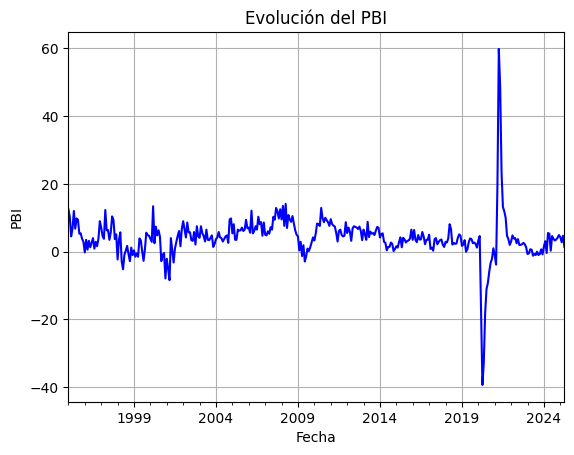

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI', title='Evolución del PBI', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI')
plt.grid(True)
plt.show()

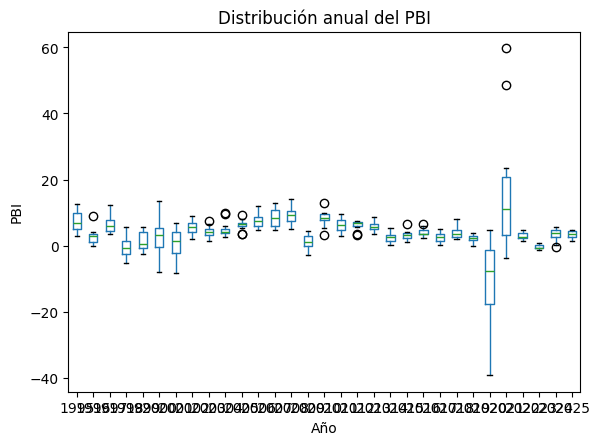

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI', by='Año', grid=False)
plt.title('Distribución anual del PBI')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI')
plt.show()

##Variación interanual desestacionalizado (Var. Mensual)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01731AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Desestacionalizado']
pbi['Fecha'] = pd.date_range(start="2003-02-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


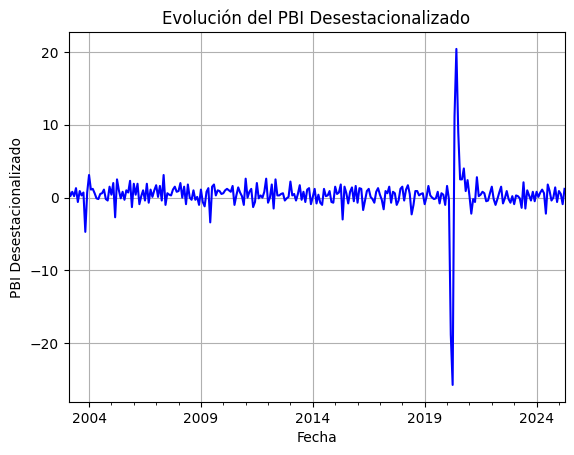

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI Desestacionalizado', title='Evolución del PBI Desestacionalizado', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Desestacionalizado')
plt.grid(True)
plt.show()

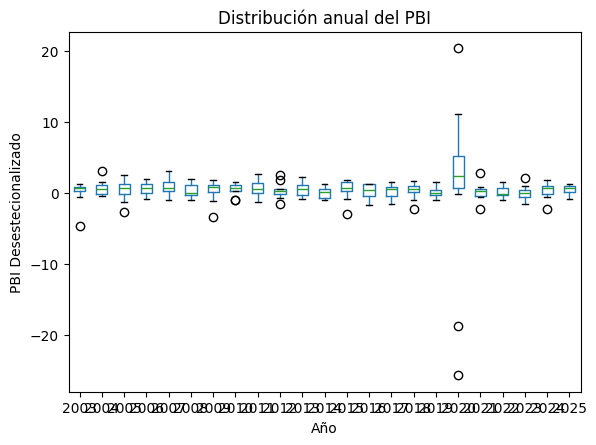

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Desestacionalizado', by='Año', grid=False)
plt.title('Distribución anual del PBI')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI Desestecionalizado')
plt.show()

##Variación interanual desestacionalizado (Var. promedio móvil 3 meses)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38082AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Desestacionalizado 3 meses']
pbi['Fecha'] = pd.date_range(start="2003-04-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


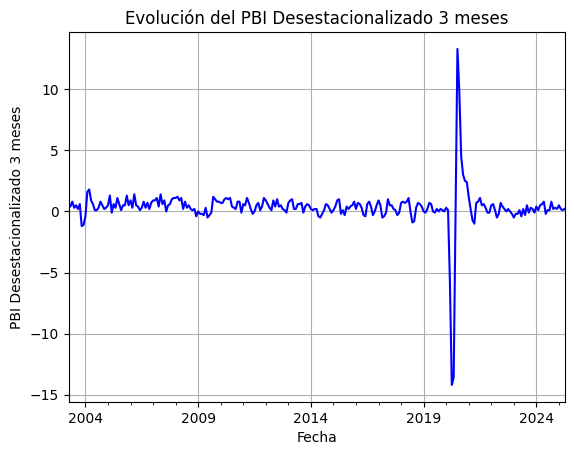

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI Desestacionalizado 3 meses', title='Evolución del PBI Desestacionalizado 3 meses', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Desestacionalizado 3 meses')
plt.grid(True)
plt.show()

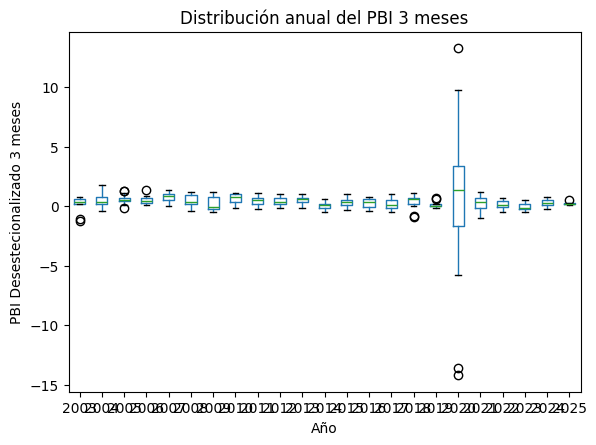

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Desestacionalizado 3 meses', by='Año', grid=False)
plt.title('Distribución anual del PBI 3 meses')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI Desestecionalizado 3 meses')
plt.show()

##Índice 2007 = 100

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01770AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="1994-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


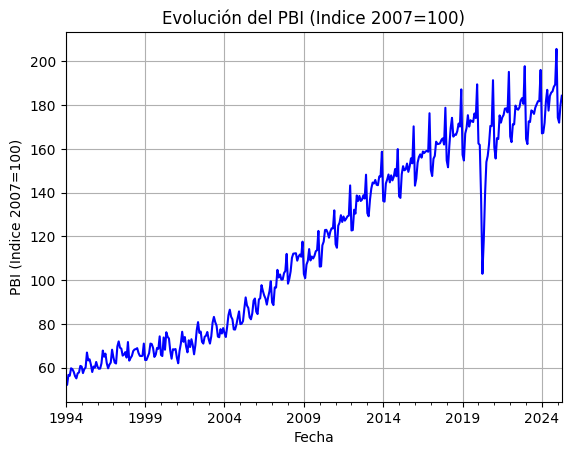

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI (Indice 2007=100)', title='Evolución del PBI (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI (Indice 2007=100)')
plt.grid(True)
plt.show()

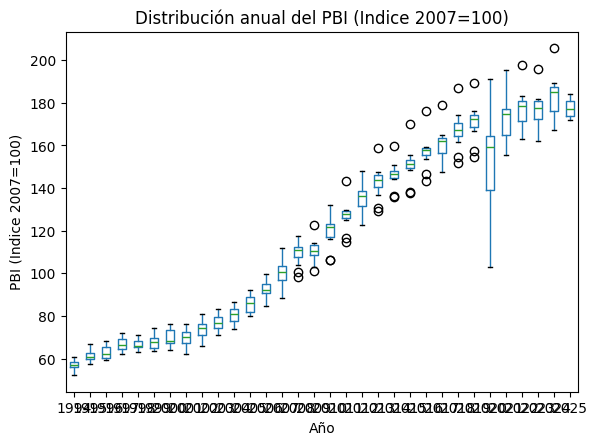

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI (Indice 2007=100)', by='Año', grid=False)
plt.title('Distribución anual del PBI (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI (Indice 2007=100)')
plt.show()

###Tasa de crecimiento del producto a 12 meses (interanual)

In [ ]:
print(pbi)
pbi['Tasa_crecimiento_12m'] = pbi['PBI (Indice 2007=100)'].pct_change(periods=12) * 100
pbi_bcrp = pbi.copy() #Renombrando para trabajar con la serie en adelante
print(pbi_bcrp)

         Fecha  PBI (Indice 2007=100)   Año
0   1994-01-01                   53.8  1994
1   1994-02-01                   52.1  1994
2   1994-03-01                   56.7  1994
3   1994-04-01                   56.3  1994
4   1994-05-01                   59.7  1994
..         ...                    ...   ...
371 2024-12-01                  205.7  2024
372 2025-01-01                  174.3  2025
373 2025-02-01                  172.0  2025
374 2025-03-01                  179.9  2025
375 2025-04-01                  184.3  2025

[376 rows x 3 columns]
         Fecha  PBI (Indice 2007=100)   Año  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...         

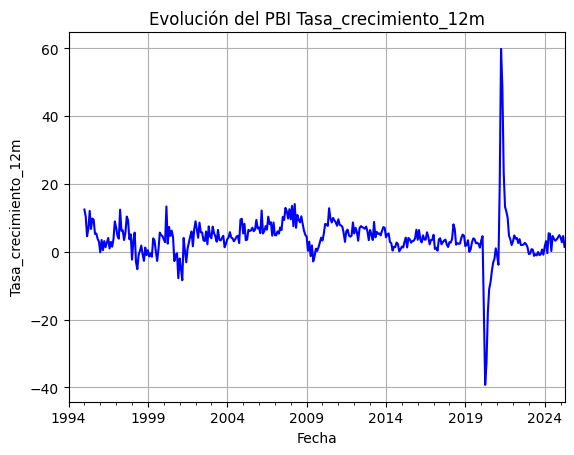

In [ ]:
# Línea temporal
pbi_bcrp.plot(x='Fecha', y='Tasa_crecimiento_12m', title='Evolución del PBI Tasa_crecimiento_12m', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa_crecimiento_12m')
plt.grid(True)
plt.show()

###Tasa de crecimiento interanual filtrado de 1994 a 2004

In [ ]:
pbi_fil1 = pbi[(pbi['Fecha'] >= '1993-01-01') & (pbi['Fecha'] <= '2004-12-01')]
print(pbi_fil1)

         Fecha  PBI (Indice 2007=100)   Año  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...                   ...
127 2004-08-01                   77.5  2004              4.447439
128 2004-09-01                   77.4  2004              4.736130
129 2004-10-01                   79.6  2004              2.577320
130 2004-11-01                   82.8  2004              9.523810
131 2004-12-01                   85.7  2004              9.731114

[132 rows x 4 columns]


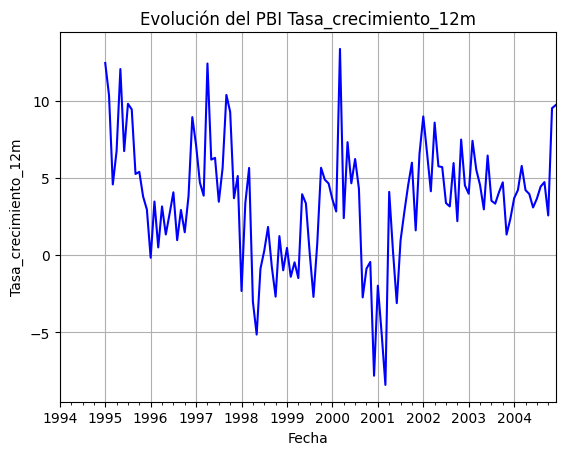

In [ ]:
# Línea temporal
pbi_fil1.plot(x='Fecha', y='Tasa_crecimiento_12m', title='Evolución del PBI Tasa_crecimiento_12m', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa_crecimiento_12m')
plt.grid(True)
plt.show()

/tmp/ipython-input-19-1542896603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi_fil1['Año'] = pbi_fil1['Fecha'].dt.year


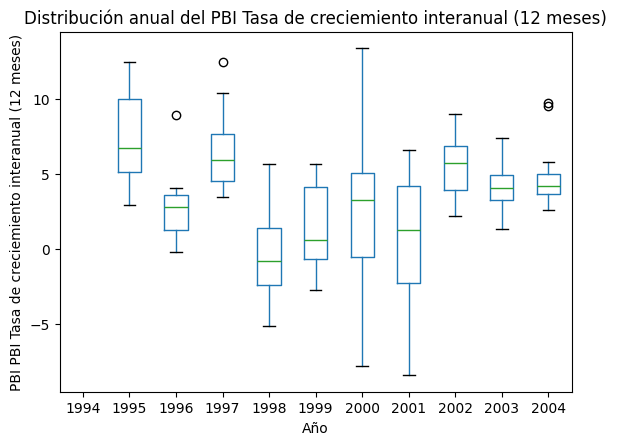

In [ ]:
# Boxplot por año
pbi_fil1['Año'] = pbi_fil1['Fecha'].dt.year
pbi_fil1.boxplot(column='Tasa_crecimiento_12m', by='Año', grid=False)
plt.title('Distribución anual del PBI Tasa de creciemiento interanual (12 meses)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI PBI Tasa de creciemiento interanual (12 meses)')
plt.show()

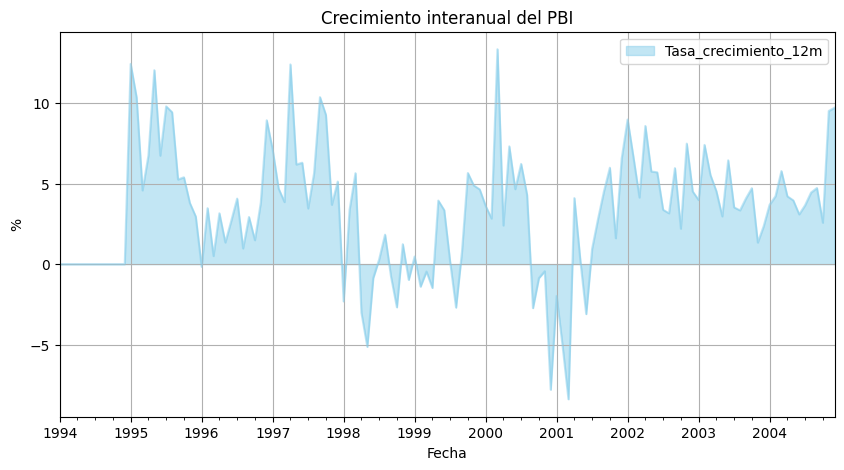

In [ ]:
# Gráfico de bandas o áreas
pbi_fil1.plot.area(x='Fecha', y='Tasa_crecimiento_12m', alpha=0.5, figsize=(10, 5), color='skyblue', stacked=False)
plt.title('Crecimiento interanual del PBI')
plt.ylabel('%')
plt.grid(True)
plt.show()

/tmp/ipython-input-21-126843073.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbi_fil1['Decada'] = (pbi_fil1['Fecha'].dt.year // 10) * 10


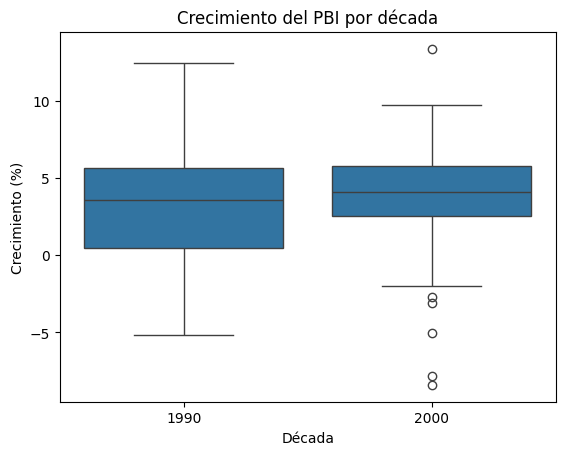

In [ ]:
# Boxplot comparativo entre décadas o gobiernos

pbi_fil1['Decada'] = (pbi_fil1['Fecha'].dt.year // 10) * 10

sns.boxplot(x='Decada', y='Tasa_crecimiento_12m', data=pbi_fil1)
plt.title('Crecimiento del PBI por década')
plt.xlabel('Década')
plt.ylabel('Crecimiento (%)')
plt.show()

##Desestacionalizado (Indice 2007=100) - mensual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01773AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI desestacionalizado (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="2003-01-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


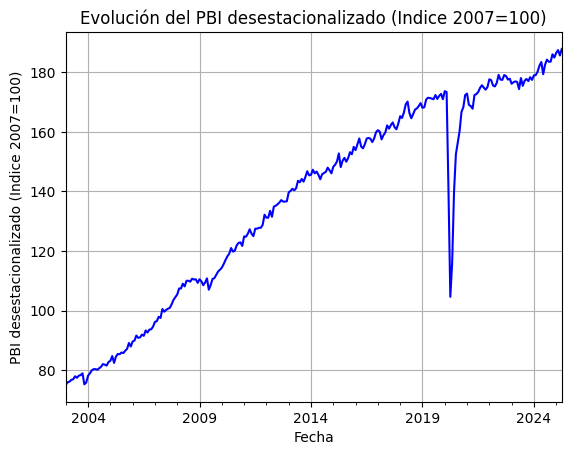

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI desestacionalizado (Indice 2007=100)', title='Evolución del PBI desestacionalizado (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI desestacionalizado (Indice 2007=100)')
plt.grid(True)
plt.show()

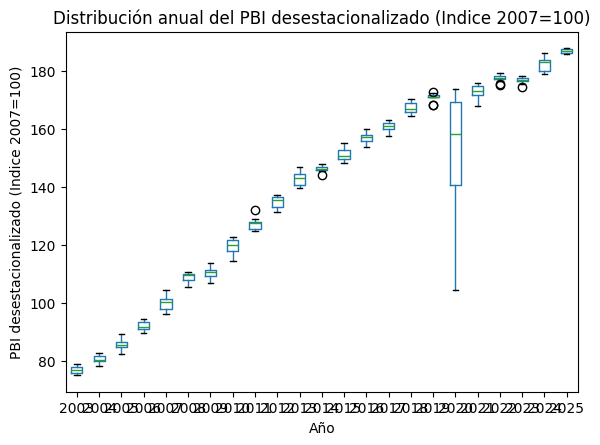

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI desestacionalizado (Indice 2007=100)', by='Año', grid=False)
plt.title('Distribución anual del PBI desestacionalizado (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI desestacionalizado (Indice 2007=100)')
plt.show()

##Desestacionalizado promedio móvil a 3 meses (Indice 2007=100)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38081AM/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI desestacionalizado 3 meses (Indice 2007=100)']
pbi['Fecha'] = pd.date_range(start="2003-03-01", periods=len(pbi), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


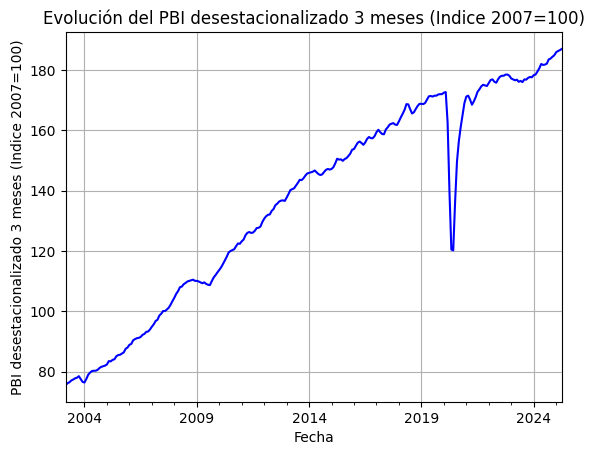

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI desestacionalizado 3 meses (Indice 2007=100)', title='Evolución del PBI desestacionalizado 3 meses (Indice 2007=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.grid(True)
plt.show()

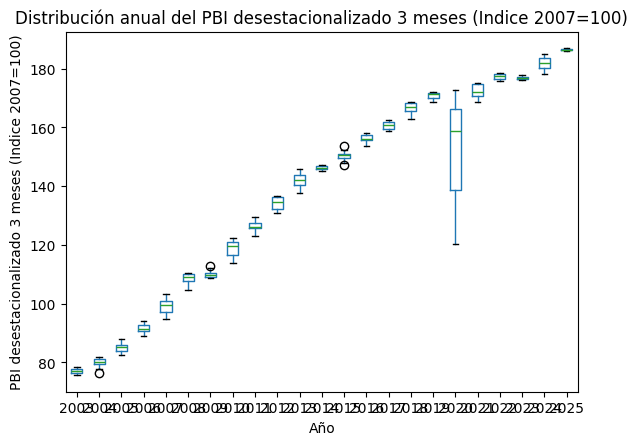

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI desestacionalizado 3 meses (Indice 2007=100)', by='Año', grid=False)
plt.title('Distribución anual del PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI desestacionalizado 3 meses (Indice 2007=100)')
plt.show()

#PBI TRIMESTRAL#

##En Millones de Soles del 2007 (real)#

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02538AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI real mill. de soles']
pbi['Fecha'] = pd.date_range(start="1979-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
print(pbi.head(10))

       Fecha  PBI real mill. de soles
0 1979-01-01                    34514
1 1979-04-01                    40882
2 1979-07-01                    40671
3 1979-10-01                    42183
4 1980-01-01                    36357
5 1980-04-01                    43102
6 1980-07-01                    42344
7 1980-10-01                    45792
8 1981-01-01                    39026
9 1981-04-01                    45858


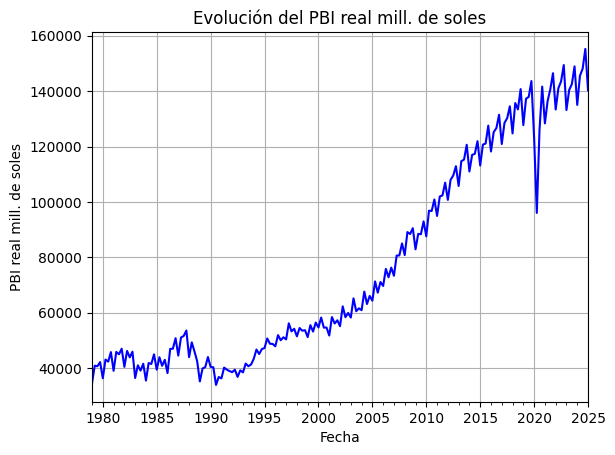

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI real mill. de soles', title='Evolución del PBI real mill. de soles', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI real mill. de soles')
plt.grid(True)
plt.show()

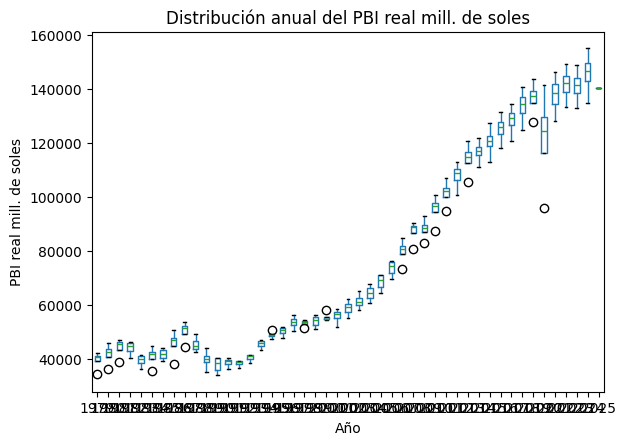

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI real mill. de soles', by='Año', grid=False)
plt.title('Distribución anual del PBI real mill. de soles')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI real mill. de soles')
plt.show()

##En Millones de Dólares##

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN39029BQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI real mill. de dolares']
pbi['Fecha'] = pd.date_range(start="1994-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


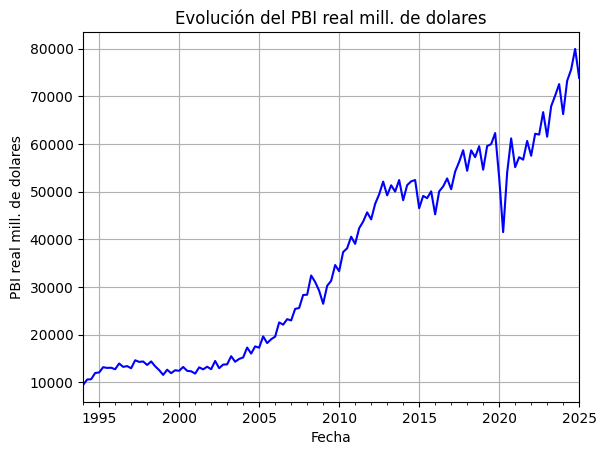

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI real mill. de dolares', title='Evolución del PBI real mill. de dolares', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI real mill. de dolares')
plt.grid(True)
plt.show()

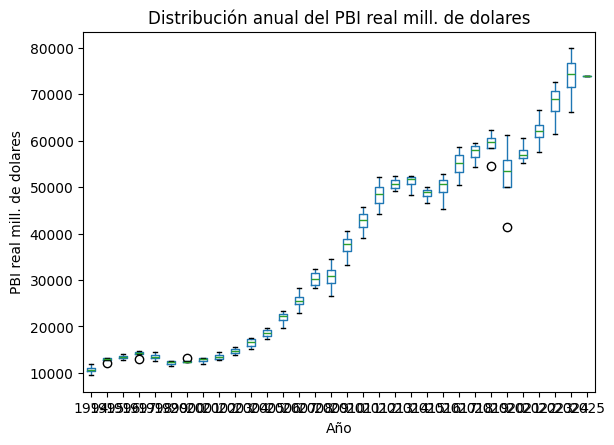

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI real mill. de dolares', by='Año', grid=False)
plt.title('Distribución anual del PBI real mill. de dolares')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI real mill. de dolares')
plt.show()

##Variaciones porcentuales reales anualizadas

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02526AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Var % real anualizada']
pbi['Fecha'] = pd.date_range(start="1980-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


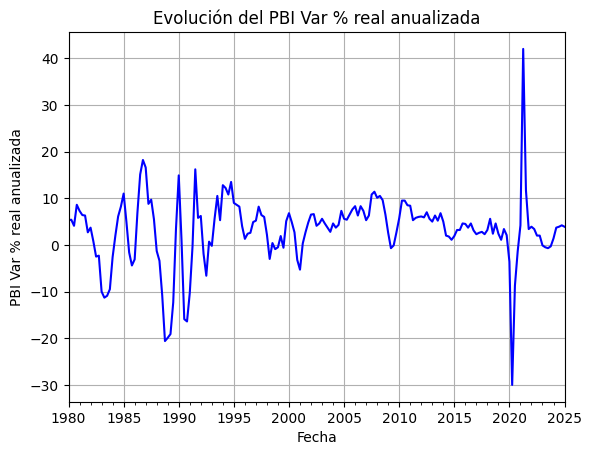

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI Var % real anualizada', title='Evolución del PBI Var % real anualizada', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Var % real anualizada')
plt.grid(True)
plt.show()

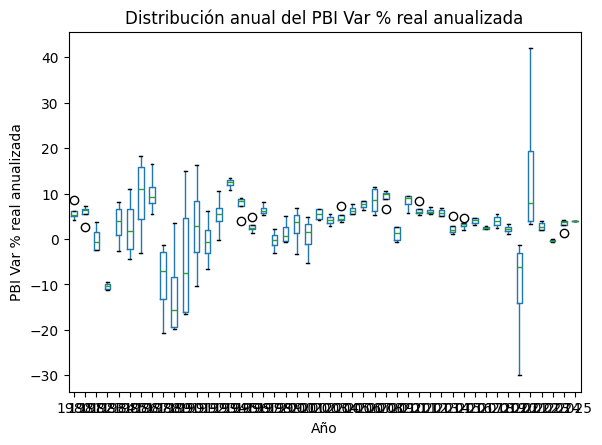

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Var % real anualizada', by='Año', grid=False)
plt.title('Distribución anual del PBI Var % real anualizada')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI Var % real anualizada')
plt.show()

##Variaciones porcentuales reales anaulizadas desestacionalizadas

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN37939AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI Var % real anualizada desestacionalizada']
pbi['Fecha'] = pd.date_range(start="2007-04-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


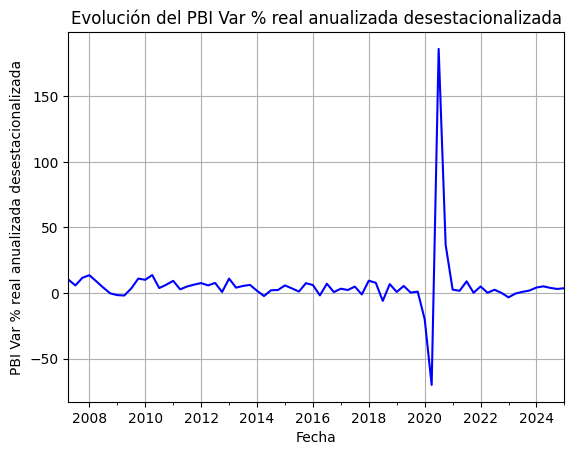

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI Var % real anualizada desestacionalizada', title='Evolución del PBI Var % real anualizada desestacionalizada', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI Var % real anualizada desestacionalizada')
plt.grid(True)
plt.show()

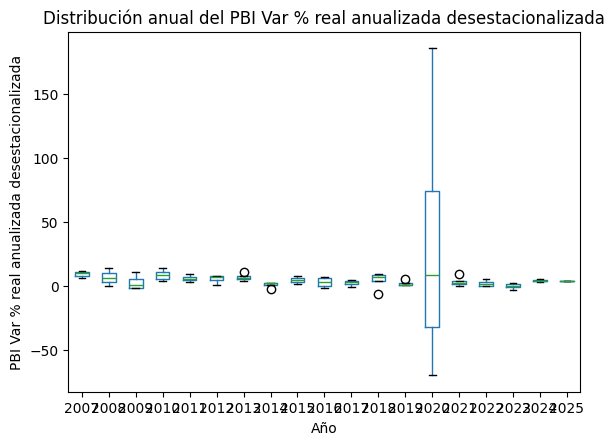

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI Var % real anualizada desestacionalizada', by='Año', grid=False)
plt.title('Distribución anual del PBI Var % real anualizada desestacionalizada')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI Var % real anualizada desestacionalizada')
plt.show()

##En Millones de soles (Nominal)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/trimestrales/resultados/PN02550AQ/html"
pbi = scraping_bcrp(url)
pbi.columns = ['Fecha', 'PBI nominal en mill de soles']
pbi['Fecha'] = pd.date_range(start="1980-01-01", periods=len(pbi), freq='QS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


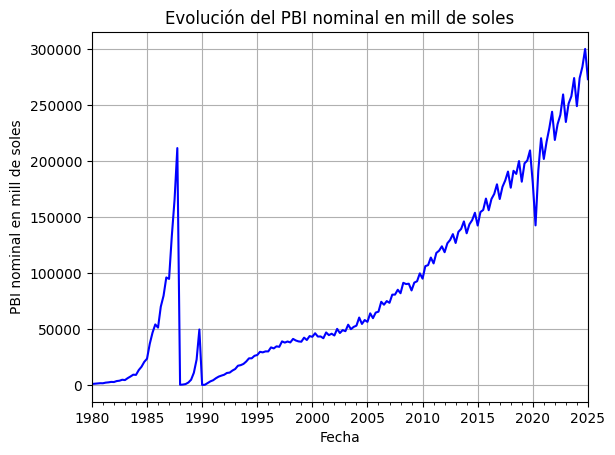

In [ ]:
# Línea temporal
pbi.plot(x='Fecha', y='PBI nominal en mill de soles', title='Evolución del PBI nominal en mill de soles', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('PBI nominal en mill de soles')
plt.grid(True)
plt.show()

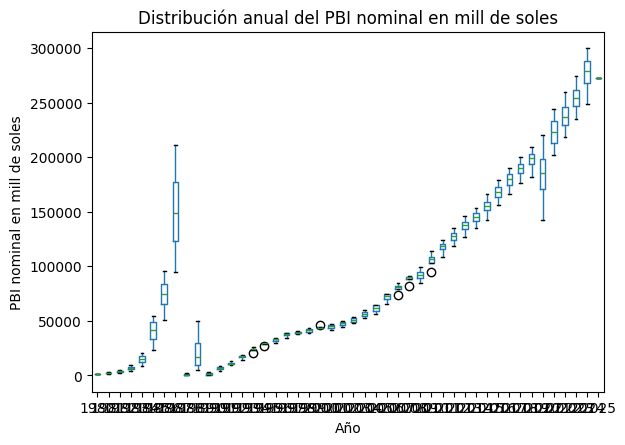

In [ ]:
# Boxplot por año
pbi['Año'] = pbi['Fecha'].dt.year
pbi.boxplot(column='PBI nominal en mill de soles', by='Año', grid=False)
plt.title('Distribución anual del PBI nominal en mill de soles')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('PBI nominal en mill de soles')
plt.show()

#IPC MENSUAL

##IPC (Índice Dic 2021 = 100)

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN38705PM/html"
ipc = scraping_bcrp(url)
ipc.columns = ['Fecha', 'IPC (Índice Dic 2021=100)']
ipc['Fecha'] = pd.date_range(start="1991-01-01", periods=len(ipc), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
pd.reset_option("all")

/tmp/ipython-input-46-3365680546.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option("all")
/tmp/ipython-input-46-3365680546.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option("all")


In [ ]:
print(ipc)

         Fecha  IPC (Índice Dic 2021=100)
0   1991-01-01                       7.39
1   1991-02-01                       8.09
2   1991-03-01                       8.71
3   1991-04-01                       9.22
4   1991-05-01                       9.93
..         ...                        ...
408 2025-01-01                     114.07
409 2025-02-01                     114.28
410 2025-03-01                     115.21
411 2025-04-01                     115.57
412 2025-05-01                     115.51

[413 rows x 2 columns]


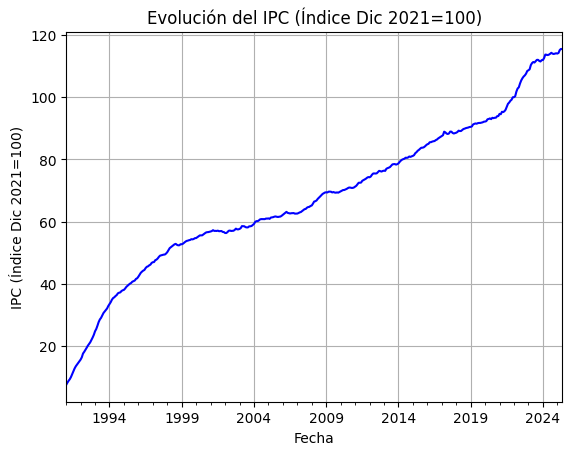

In [ ]:
# Línea temporal
ipc.plot(x='Fecha', y='IPC (Índice Dic 2021=100)', title='Evolución del IPC (Índice Dic 2021=100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Índice Dic 2021=100)')
plt.grid(True)
plt.show()

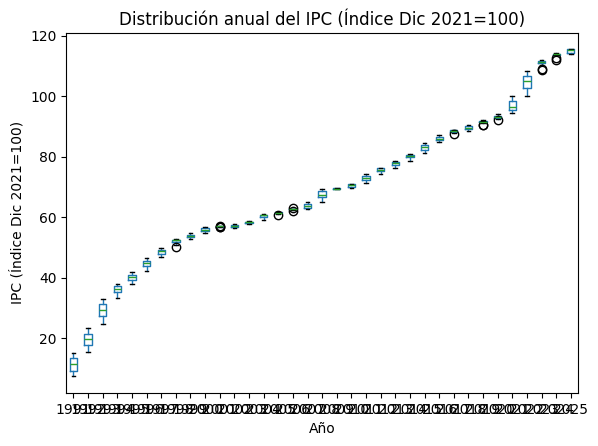

In [ ]:
# Boxplot por año
ipc['Año'] = ipc['Fecha'].dt.year
ipc.boxplot(column='IPC (Índice Dic 2021=100)', by='Año', grid=False)
plt.title('Distribución anual del IPC (Índice Dic 2021=100)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('IPC (Índice Dic 2021=100)')
plt.show()

##IPC (Índice 2009 = 100) descontinuada

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01270PM/html"
ipc_2009 = scraping_bcrp(url)
ipc_2009.columns = ['Fecha', 'IPC (Índice 2009 = 100)']
ipc_2009['Fecha'] = pd.date_range(start="1949-01-01", periods=len(ipc_2009), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


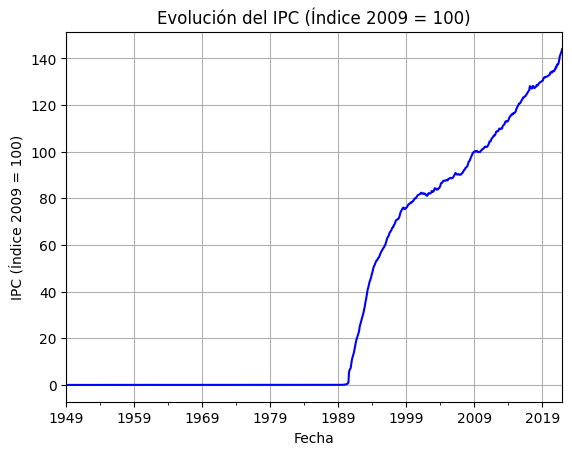

In [ ]:
# Línea temporal
ipc_2009.plot(x='Fecha', y='IPC (Índice 2009 = 100)', title='Evolución del IPC (Índice 2009 = 100)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Índice 2009 = 100)')
plt.grid(True)
plt.show()

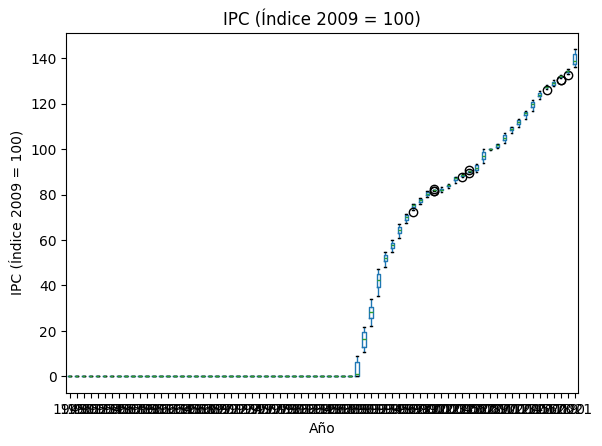

In [ ]:
# Boxplot por año
ipc_2009['Año'] = ipc_2009['Fecha'].dt.year
ipc_2009.boxplot(column='IPC (Índice 2009 = 100)', by='Año', grid=False)
plt.title('IPC (Índice 2009 = 100)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('IPC (Índice 2009 = 100)')
plt.show()

##IPC Var % Mensual

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01271PM/html"
ipc_mens = scraping_bcrp(url)
ipc_mens.columns = ['Fecha', 'IPC (Var % Mensual)']
ipc_mens['Fecha'] = pd.date_range(start="1949-02-01", periods=len(ipc_mens), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


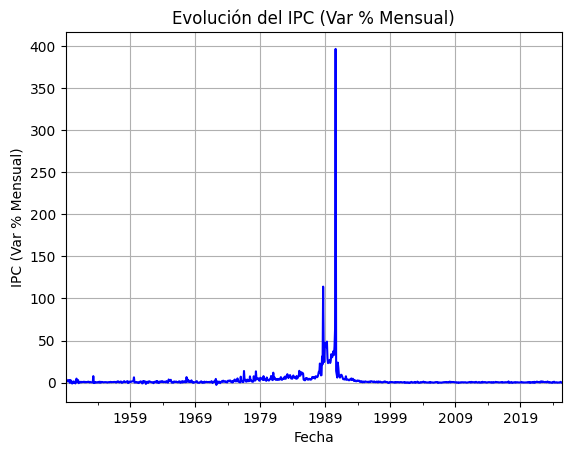

In [ ]:
# Línea temporal
ipc_mens.plot(x='Fecha', y='IPC (Var % Mensual)', title='Evolución del IPC (Var % Mensual)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % Mensual)')
plt.grid(True)
plt.show()

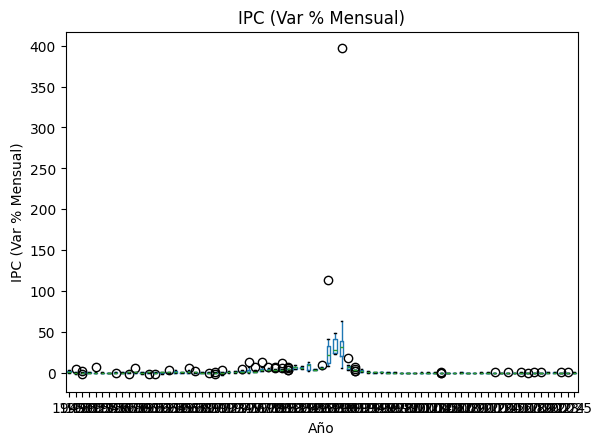

In [ ]:
# Boxplot por año
ipc_mens['Año'] = ipc_mens['Fecha'].dt.year
ipc_mens.boxplot(column='IPC (Var % Mensual)', by='Año', grid=False)
plt.title('IPC (Var % Mensual)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('IPC (Var % Mensual)')
plt.show()

##IPC Var % Mensual Acumulada

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01272PM/html"
ipc_acum = scraping_bcrp(url)
ipc_acum.columns = ['Fecha', 'IPC (Var % Mensual acumulada)']
ipc_acum['Fecha'] = pd.date_range(start="1950-01-01", periods=len(ipc_acum), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


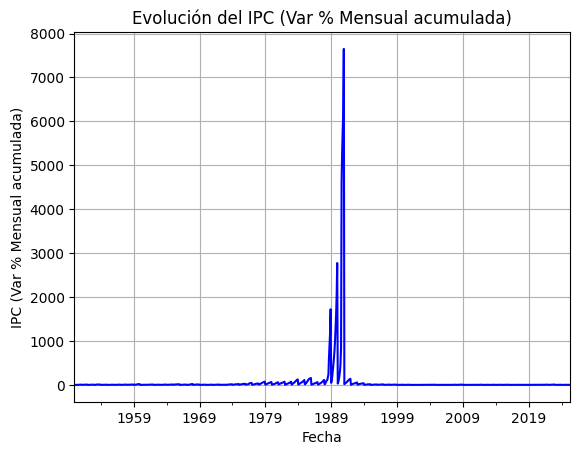

In [ ]:
# Línea temporal
ipc_acum.plot(x='Fecha', y='IPC (Var % Mensual acumulada)', title='Evolución del IPC (Var % Mensual acumulada)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % Mensual acumulada)')
plt.grid(True)
plt.show()

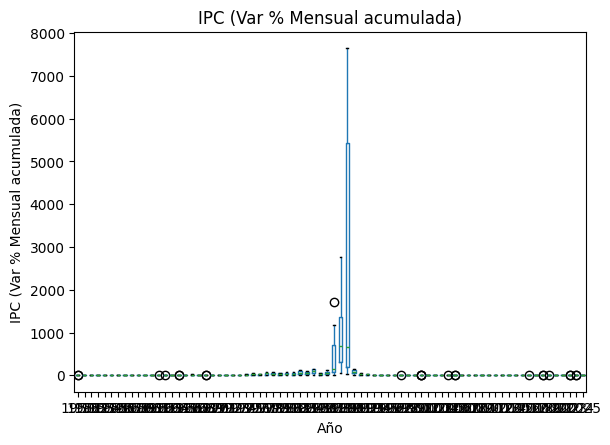

In [ ]:
# Boxplot por año
ipc_acum['Año'] = ipc_acum['Fecha'].dt.year
ipc_acum.boxplot(column='IPC (Var % Mensual acumulada)', by='Año', grid=False)
plt.title('IPC (Var % Mensual acumulada)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('IPC (Var % Mensual acumulada)')
plt.show()

##IPC Var % 12 meses

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN01273PM/html"
ipc_12 = scraping_bcrp(url)
ipc_12.columns = ['Fecha', 'IPC (Var % 12 meses)']
ipc_12['Fecha'] = pd.date_range(start="1950-01-01", periods=len(ipc_12), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


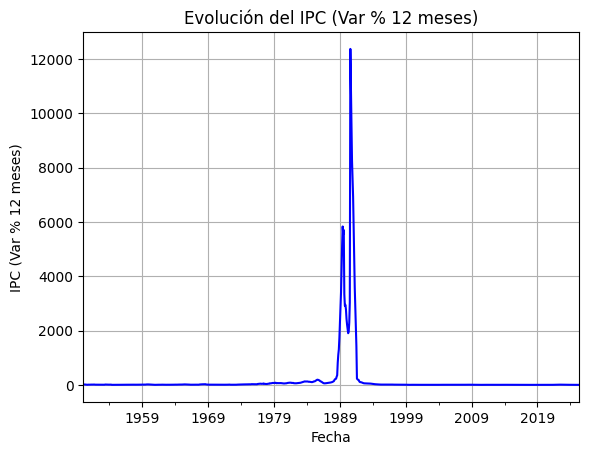

In [ ]:
# Línea temporal
ipc_12.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evolución del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

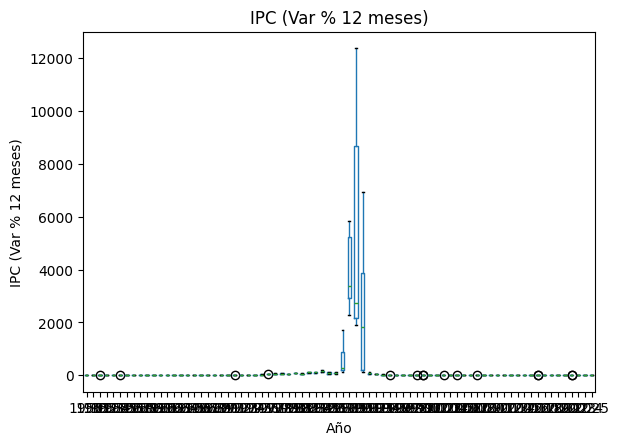

In [ ]:
# Boxplot por año
ipc_12['Año'] = ipc_12['Fecha'].dt.year
ipc_12.boxplot(column='IPC (Var % 12 meses)', by='Año', grid=False)
plt.title('IPC (Var % 12 meses)')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('IPC (Var % 12 meses)')
plt.show()

In [ ]:
ipc_fil1 = ipc_12[ipc_12['Fecha'] >= '1993-01-01']
print(ipc_fil1)

         Fecha  IPC (Var % 12 meses)   Año
516 1993-01-01                 58.71  1993
517 1993-02-01                 55.97  1993
518 1993-03-01                 51.32  1993
519 1993-04-01                 53.16  1993
520 1993-05-01                 52.56  1993
..         ...                   ...   ...
900 2025-01-01                  1.85  2025
901 2025-02-01                  1.48  2025
902 2025-03-01                  1.28  2025
903 2025-04-01                  1.65  2025
904 2025-05-01                  1.69  2025

[389 rows x 3 columns]


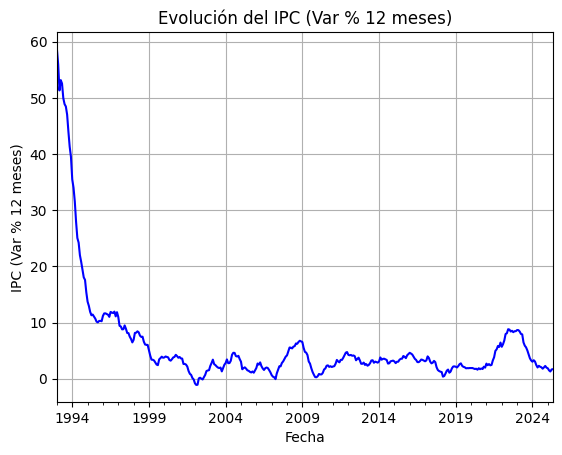

In [ ]:
# Línea temporal
ipc_fil1.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evolución del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

         Fecha  IPC (Var % 12 meses)   Año
516 1993-01-01                 58.71  1993
517 1993-02-01                 55.97  1993
518 1993-03-01                 51.32  1993
519 1993-04-01                 53.16  1993
520 1993-05-01                 52.56  1993
..         ...                   ...   ...
655 2004-08-01                  4.59  2004
656 2004-09-01                  4.03  2004
657 2004-10-01                  3.95  2004
658 2004-11-01                  4.07  2004
659 2004-12-01                  3.48  2004

[144 rows x 3 columns]


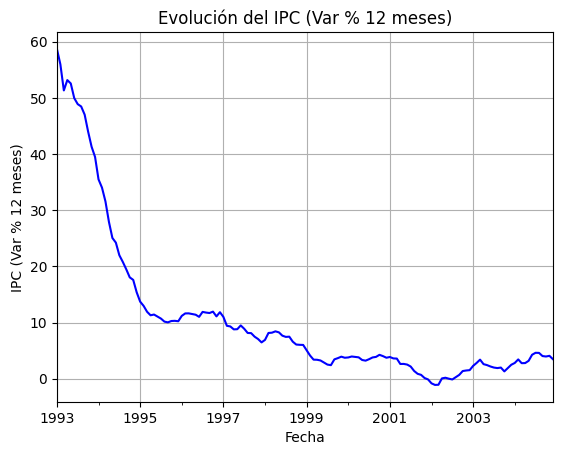

In [ ]:
ipc_fil2 = ipc_12[(ipc_12['Fecha'] >= '1993-01-01') & (ipc_12['Fecha'] <= '2004-12-01')]
print(ipc_fil2)

# Línea temporal
ipc_fil2.plot(x='Fecha', y='IPC (Var % 12 meses)', title='Evolución del IPC (Var % 12 meses)', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('IPC (Var % 12 meses)')
plt.grid(True)
plt.show()

##Graficando las series del IPC juntas

In [ ]:
# 1. Filtrar por periodo
start_date = '1993-01-01'
end_date = '2004-12-01'

ipc_g = ipc[(ipc['Fecha'] >= start_date) & (ipc['Fecha'] <= end_date)]
ipc_mens_g = ipc_mens[(ipc_mens['Fecha'] >= start_date) & (ipc_mens['Fecha'] <= end_date)]
ipc_acum_g = ipc_acum[(ipc_acum['Fecha'] >= start_date) & (ipc_acum['Fecha'] <= end_date)]
ipc_12_g = ipc_12[(ipc_12['Fecha'] >= start_date) & (ipc_12['Fecha'] <= end_date)]

# 2. Unir en un solo DataFrame por 'Fecha'
df_merged = ipc_g[['Fecha']].copy()

df_merged['IPC Índice'] = ipc_g['IPC (Índice Dic 2021=100)'].values
df_merged['Var. mensual (%)'] = ipc_mens_g['IPC (Var % Mensual)'].values
df_merged['Var. acumulada (%)'] = ipc_acum_g['IPC (Var % Mensual acumulada)'].values
df_merged['Inflación 12m (%)'] = ipc_12_g['IPC (Var % 12 meses)'].values


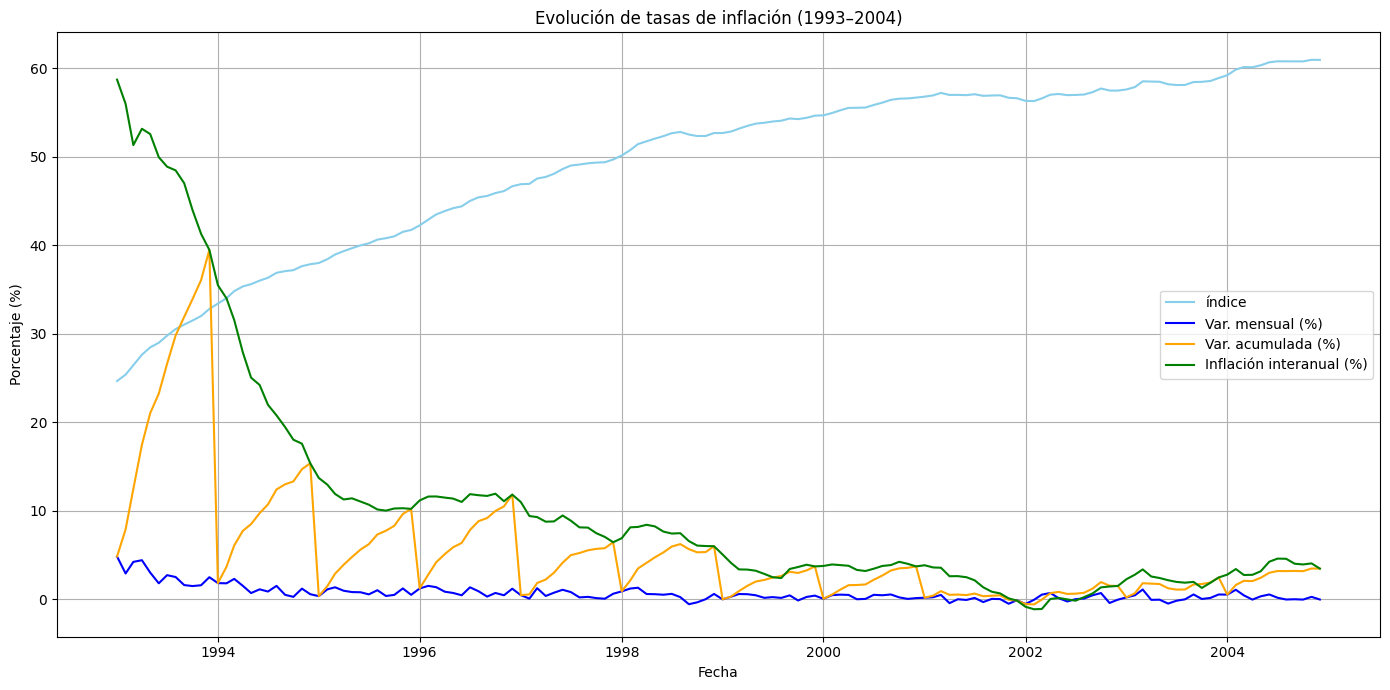

In [ ]:
# 3. Graficar las 3 tasas (omitimos el índice IPC base)
plt.figure(figsize=(14, 7))

plt.plot(df_merged['Fecha'], df_merged['IPC Índice'], label='índice', color='skyblue')
plt.plot(df_merged['Fecha'], df_merged['Var. mensual (%)'], label='Var. mensual (%)', color='blue')
plt.plot(df_merged['Fecha'], df_merged['Var. acumulada (%)'], label='Var. acumulada (%)', color='orange')
plt.plot(df_merged['Fecha'], df_merged['Inflación 12m (%)'], label='Inflación interanual (%)', color='green')

plt.title('Evolución de tasas de inflación (1993–2004)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##Generando las series de IPC a partir de IPC(Índice Dic 2021 = 100)

**1. Variación % mensual (Inflación mensual)**

$$
\text{Var.% mensual}_t = \left( \frac{IPC_t - IPC_{t-1}}{IPC_{t-1}} \right) \times 100
$$




In [ ]:
ipc['Var_mensual_%'] = ipc['IPC (Índice Dic 2021=100)'].pct_change(periods=1) * 100
print(ipc)

         Fecha  IPC (Índice Dic 2021=100)   Año  Var_mensual_%
0   1991-01-01                       7.39  1991            NaN
1   1991-02-01                       8.09  1991       9.472260
2   1991-03-01                       8.71  1991       7.663782
3   1991-04-01                       9.22  1991       5.855339
4   1991-05-01                       9.93  1991       7.700651
..         ...                        ...   ...            ...
408 2025-01-01                     114.07  2025      -0.087589
409 2025-02-01                     114.28  2025       0.184097
410 2025-03-01                     115.21  2025       0.813791
411 2025-04-01                     115.57  2025       0.312473
412 2025-05-01                     115.51  2025      -0.051917

[413 rows x 4 columns]


**2. Variación % acumulada en el año (enero a t)**


$$
\text{Var.% acumulada}_t = \left( \frac{IPC_t - IPC_{\text{enero del año}}}{IPC_{\text{enero del año}}} \right) \times 100
$$

Se compara cada mes con el valor de enero del mismo año.

In [ ]:
# Asegúrate de tener columna de año y mes
ipc['Año'] = ipc['Fecha'].dt.year
ipc['Mes'] = ipc['Fecha'].dt.month

# Calcular IPC de enero de cada año
ipc['IPC_enero'] = ipc.groupby('Año')['IPC (Índice Dic 2021=100)'].transform('first')

# Variación acumulada
ipc['Var_acumulada_%'] = (ipc['IPC (Índice Dic 2021=100)'] - ipc['IPC_enero']) / ipc['IPC_enero'] * 100
print(ipc)

         Fecha  IPC (Índice Dic 2021=100)   Año  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  
0         7.39         0.000000  
1         7.39         9.472260  
2         7.39        17.861976  
3         7

**3. Variación % interanual (12 meses) → Inflación anual**

$$
\text{Inflación interanual}_t = \left( \frac{IPC_t - IPC_{\text{t-12}}}{IPC_{\text{t-12}}} \right) \times 100
$$


In [ ]:
ipc['Inflación_12m_%'] = ipc['IPC (Índice Dic 2021=100)'].pct_change(periods=12) * 100
print(ipc)

         Fecha  IPC (Índice Dic 2021=100)   Año  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  Inflación_12m_%  
0         7.39         0.000000              NaN  
1         7.39         9.472260              

In [ ]:
# Filtrar el periodo 1993-2004
ipc_filtrado = ipc[(ipc['Fecha'] >= '1993-01-01') & (ipc['Fecha'] <= '2004-12-01')]

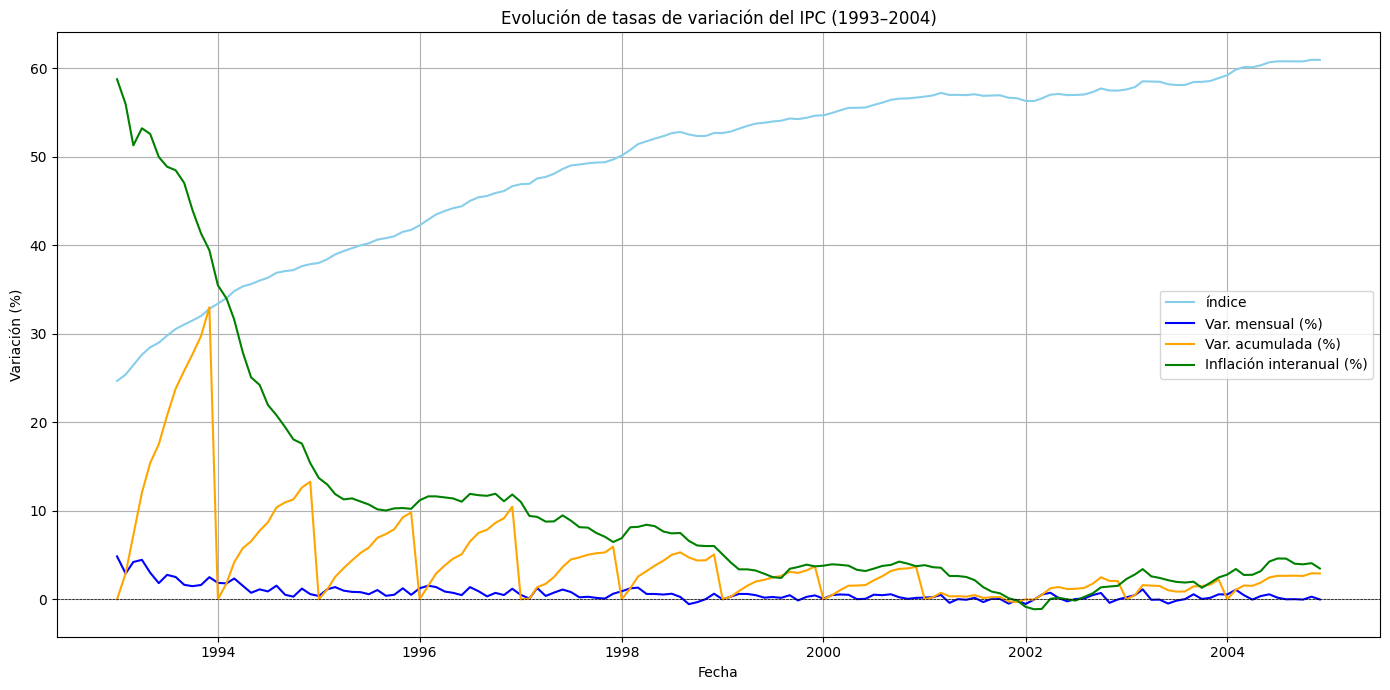

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['IPC (Índice Dic 2021=100)'], label='índice', color='skyblue')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Var_mensual_%'], label='Var. mensual (%)', color='blue')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Var_acumulada_%'], label='Var. acumulada (%)', color='orange')
plt.plot(ipc_filtrado['Fecha'], ipc_filtrado['Inflación_12m_%'], label='Inflación interanual (%)', color='green')

# Personalización
plt.title('Evolución de tasas de variación del IPC (1993–2004)')
plt.xlabel('Fecha')
plt.ylabel('Variación (%)')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#TASA EN MN MENSUAL

## TASA DE INTERES INTERBANCARIA MN Promedio

In [ ]:
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/mensuales/resultados/PN07819NM/html"
tii = scraping_bcrp(url)
tii.columns = ['Fecha', 'Tasa de interés interbancaria promedio en MN']
tii['Fecha'] = pd.date_range(start="1995-10-01", periods=len(tii), freq='MS')

/tmp/ipython-input-2-3865388823.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(tables[1]))[0]


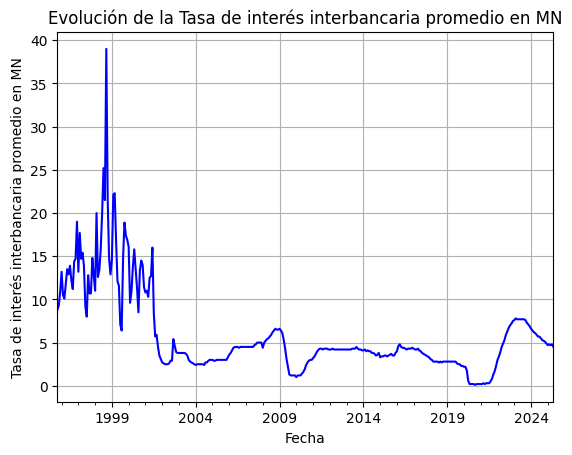

In [ ]:
# Línea temporal
tii.plot(x='Fecha', y='Tasa de interés interbancaria promedio en MN', title='Evolución de la Tasa de interés interbancaria promedio en MN', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa de interés interbancaria promedio en MN')
plt.grid(True)
plt.show()

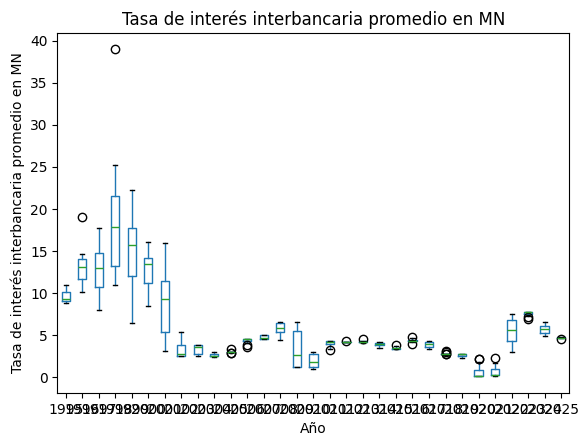

In [ ]:
# Boxplot por año
tii['Año'] = tii['Fecha'].dt.year
tii.boxplot(column='Tasa de interés interbancaria promedio en MN', by='Año', grid=False)
plt.title('Tasa de interés interbancaria promedio en MN')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('Tasa de interés interbancaria promedio en MN')
plt.show()

In [ ]:
tii_filt1 = tii[(tii['Fecha'] >= '1993-01-01') & (tii['Fecha'] <= '2004-12-01')]
print(tii_filt1)

         Fecha  Tasa de interés interbancaria promedio en MN   Año
0   1995-10-01                                           8.8  1995
1   1995-11-01                                           9.3  1995
2   1995-12-01                                          10.9  1995
3   1996-01-01                                          13.2  1996
4   1996-02-01                                          10.5  1996
..         ...                                           ...   ...
106 2004-08-01                                           2.7  2004
107 2004-09-01                                           2.7  2004
108 2004-10-01                                           2.9  2004
109 2004-11-01                                           3.0  2004
110 2004-12-01                                           3.0  2004

[111 rows x 3 columns]


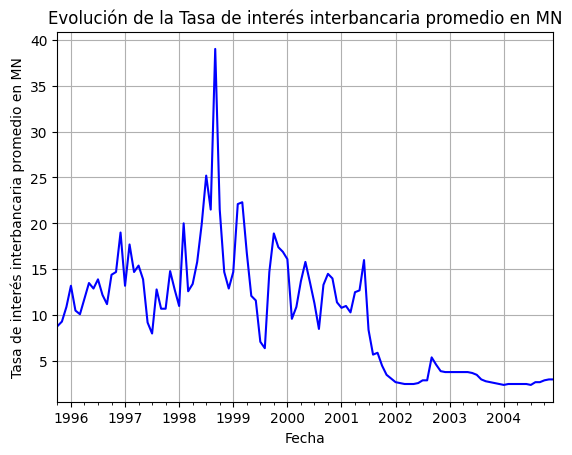

In [ ]:
# Línea temporal
tii_filt1.plot(x='Fecha', y='Tasa de interés interbancaria promedio en MN', title='Evolución de la Tasa de interés interbancaria promedio en MN', legend=False, color='blue')
plt.xlabel('Fecha')
plt.ylabel('Tasa de interés interbancaria promedio en MN')
plt.grid(True)
plt.show()

#ANÁLISIS DE LAS SERIES BASADO EN EL BCRP

##Series usadas por el BCRP

In [ ]:
# Tasa de crecimiento del producto (12 meses) a partir del PBI indice (2007=100)
print(pbi_bcrp)

         Fecha  PBI (Indice 2007=100)   Año  Tasa_crecimiento_12m
0   1994-01-01                   53.8  1994                   NaN
1   1994-02-01                   52.1  1994                   NaN
2   1994-03-01                   56.7  1994                   NaN
3   1994-04-01                   56.3  1994                   NaN
4   1994-05-01                   59.7  1994                   NaN
..         ...                    ...   ...                   ...
371 2024-12-01                  205.7  2024              4.895461
372 2025-01-01                  174.3  2025              4.308797
373 2025-02-01                  172.0  2025              2.809325
374 2025-03-01                  179.9  2025              4.653869
375 2025-04-01                  184.3  2025              1.430930

[376 rows x 4 columns]


In [ ]:
# Inflación
print(ipc)

         Fecha  IPC (Índice Dic 2021=100)   Año  Var_mensual_%  Mes  \
0   1991-01-01                       7.39  1991            NaN    1   
1   1991-02-01                       8.09  1991       9.472260    2   
2   1991-03-01                       8.71  1991       7.663782    3   
3   1991-04-01                       9.22  1991       5.855339    4   
4   1991-05-01                       9.93  1991       7.700651    5   
..         ...                        ...   ...            ...  ...   
408 2025-01-01                     114.07  2025      -0.087589    1   
409 2025-02-01                     114.28  2025       0.184097    2   
410 2025-03-01                     115.21  2025       0.813791    3   
411 2025-04-01                     115.57  2025       0.312473    4   
412 2025-05-01                     115.51  2025      -0.051917    5   

     IPC_enero  Var_acumulada_%  Inflación_12m_%  
0         7.39         0.000000              NaN  
1         7.39         9.472260              

In [ ]:
# Tasa de interés interbancaria en MN
print(tii)

         Fecha  Tasa de interés interbancaria promedio en MN   Año
0   1995-10-01                                           8.8  1995
1   1995-11-01                                           9.3  1995
2   1995-12-01                                          10.9  1995
3   1996-01-01                                          13.2  1996
4   1996-02-01                                          10.5  1996
..         ...                                           ...   ...
351 2025-01-01                                           4.7  2025
352 2025-02-01                                           4.8  2025
353 2025-03-01                                           4.7  2025
354 2025-04-01                                           4.8  2025
355 2025-05-01                                           4.5  2025

[356 rows x 3 columns]


###Gráficos comparativos

In [ ]:
# 1. Filtrar por periodo
start_date = '1995-10-01'
end_date = '2019-12-01'

pbi_bcrp_g = pbi_bcrp[(pbi_bcrp['Fecha'] >= start_date) & (pbi_bcrp['Fecha'] <= end_date)]
ipc_g = ipc[(ipc['Fecha'] >= start_date) & (ipc['Fecha'] <= end_date)]
tii_g = tii[(tii['Fecha'] >= start_date) & (tii['Fecha'] <= end_date)]

# 2. Unir en un solo DataFrame por 'Fecha'
df_bcrp = pbi_bcrp_g[['Fecha']].copy()

df_bcrp['PBI Tasa de crecimiento interanual'] = pbi_bcrp_g['Tasa_crecimiento_12m'].values
df_bcrp['Inflación (%)'] = ipc_g['Inflación_12m_%'].values
df_bcrp['Tasa de interés (%)'] = tii_g['Tasa de interés interbancaria promedio en MN'].values


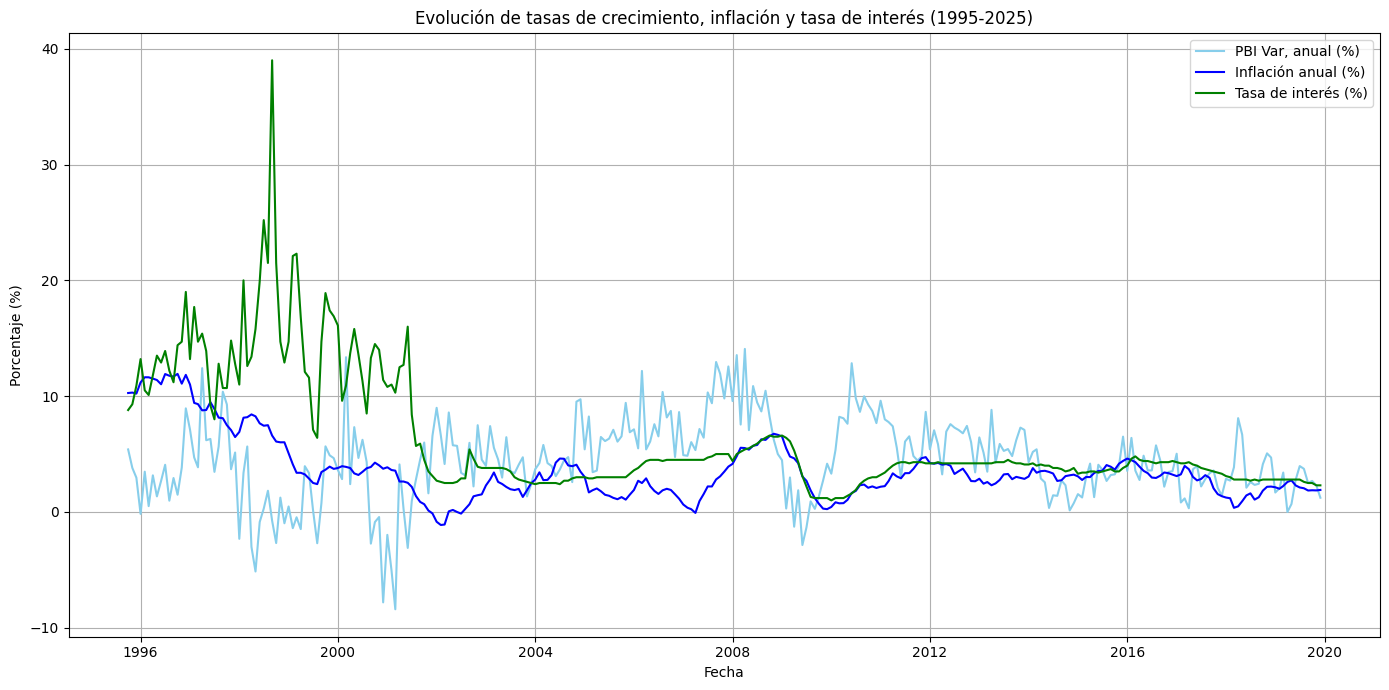

In [ ]:
# 3. Graficar las 3 tasas para comparar el comportamiento
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflación (%)'], label='Inflación anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de interés (%)'], label='Tasa de interés (%)', color='green')

plt.title('Evolución de tasas de crecimiento, inflación y tasa de interés (1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

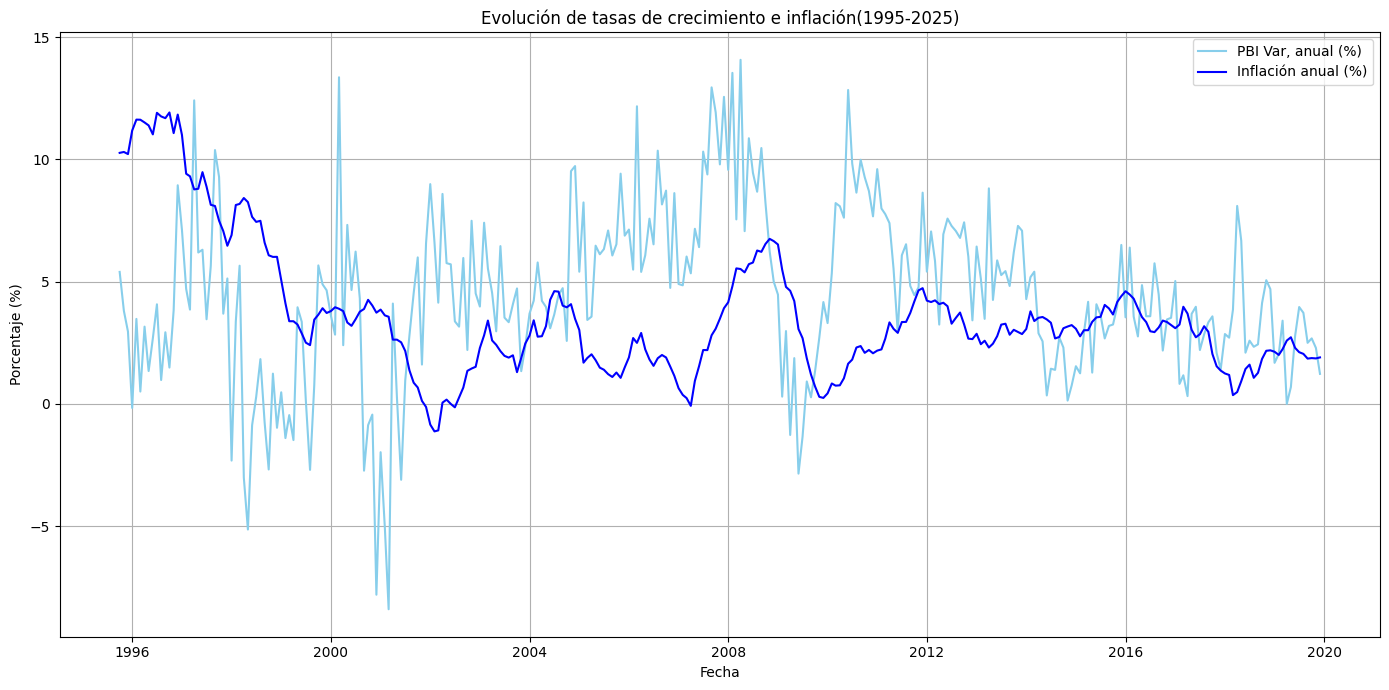

In [ ]:
# 4. Graficar PBI vs Inflacion
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflación (%)'], label='Inflación anual (%)', color='blue')

plt.title('Evolución de tasas de crecimiento e inflación(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

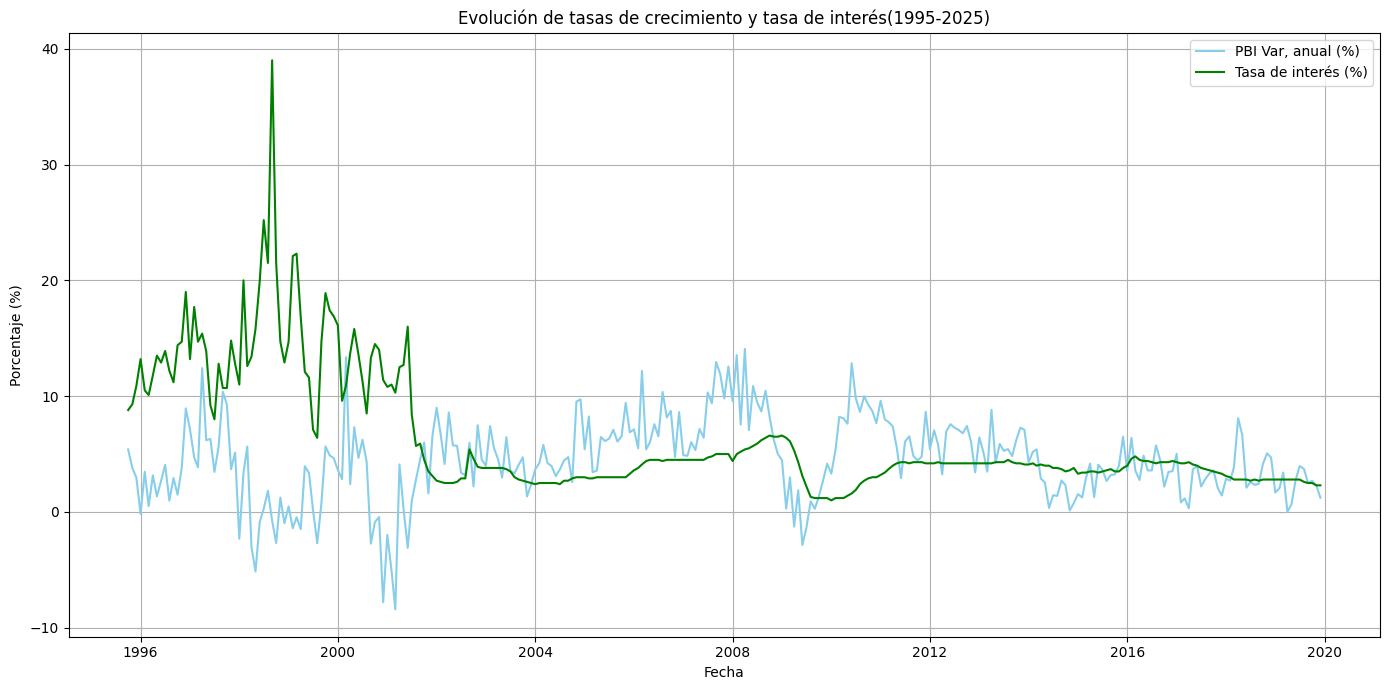

In [ ]:
# 4. Graficar PBI vs tasa de interés
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de interés (%)'], label='Tasa de interés (%)', color='green')

plt.title('Evolución de tasas de crecimiento y tasa de interés(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

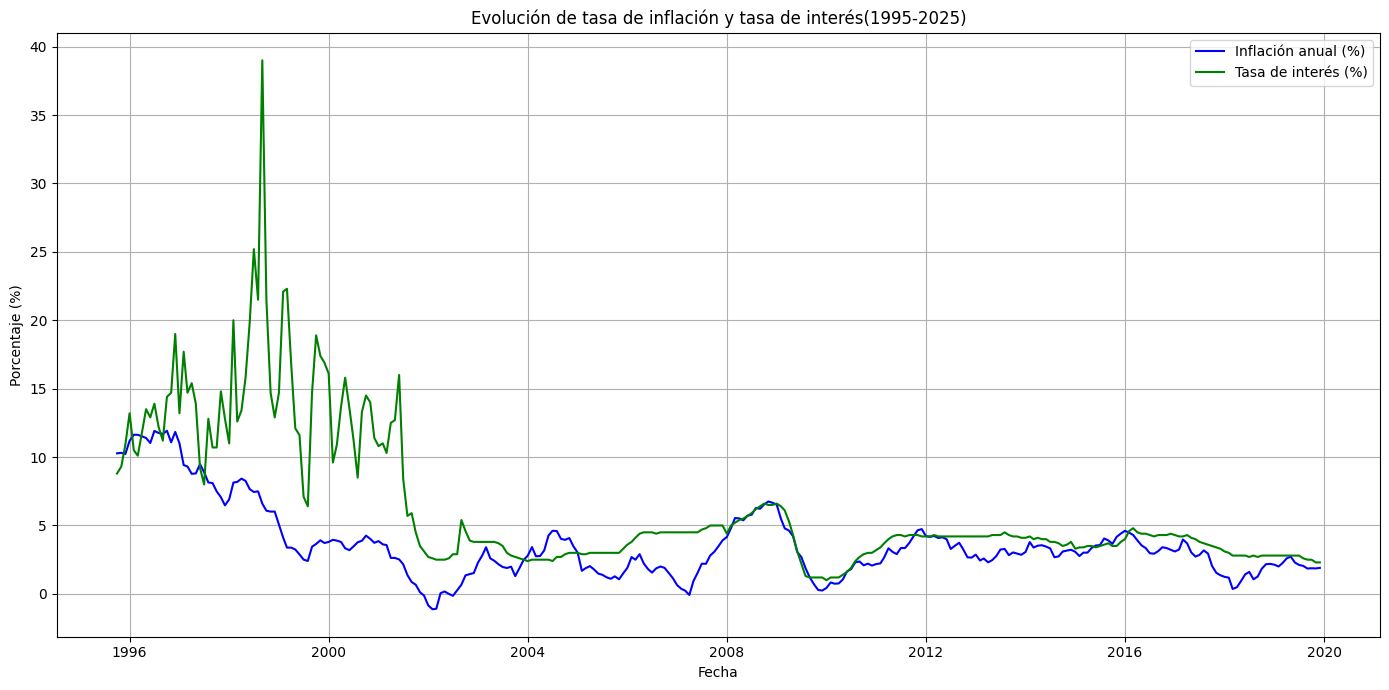

In [ ]:
# 5. Graficar Inflación vs tasa de interés
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['Inflación (%)'], label='Inflación anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de interés (%)'], label='Tasa de interés (%)', color='green')

plt.title('Evolución de tasa de inflación y tasa de interés(1995-2025)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###Matriz de correlación

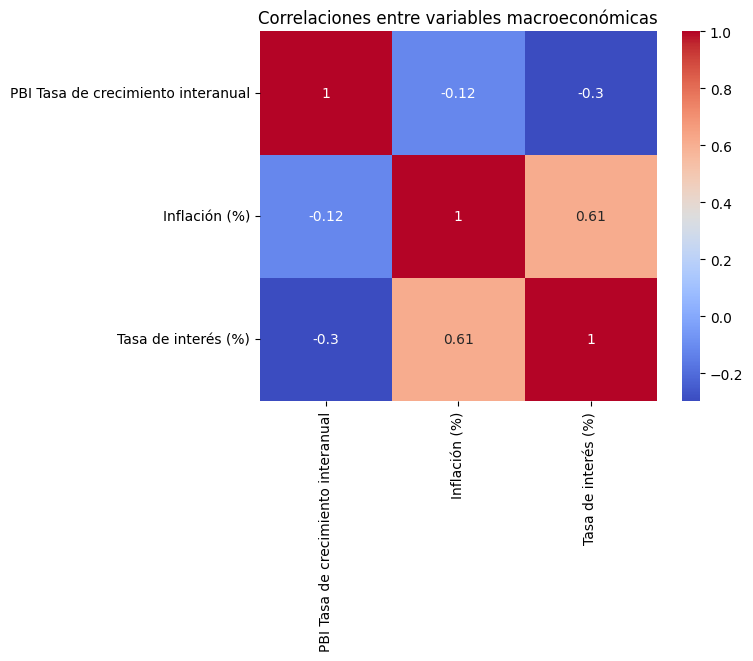

In [ ]:
# 6. Correlaciones

df_corr = df_bcrp[['PBI Tasa de crecimiento interanual', 'Inflación (%)', 'Tasa de interés (%)']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables macroeconómicas')
plt.show()

###Gráficos de dispersión

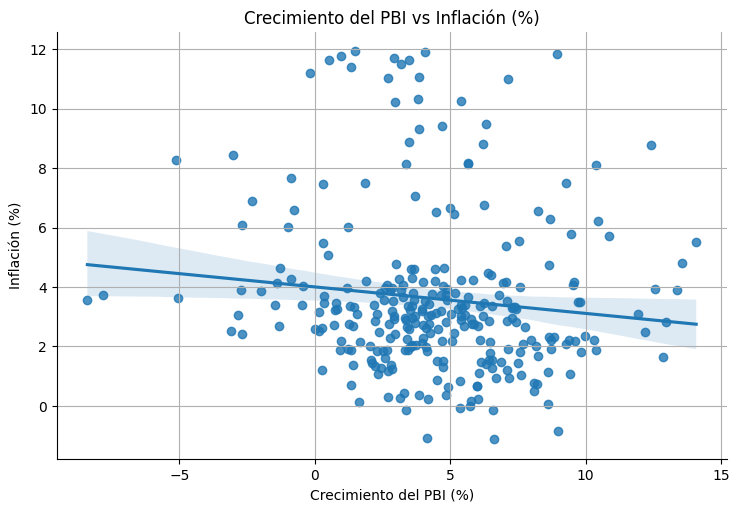

In [ ]:
# 7. Gráfico de dispersión
sns.lmplot(x='PBI Tasa de crecimiento interanual', y='Inflación (%)', data=df_bcrp, aspect=1.5)
plt.title('Crecimiento del PBI vs Inflación (%)')
plt.xlabel('Crecimiento del PBI (%)')
plt.ylabel('Inflación (%)')
plt.grid(True)
plt.show()

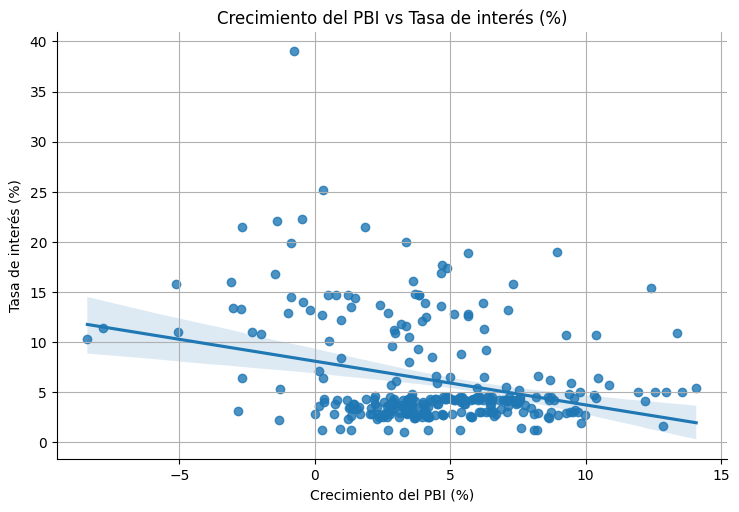

In [ ]:
# 7. Gráfico de dispersión
sns.lmplot(x='PBI Tasa de crecimiento interanual', y='Tasa de interés (%)', data=df_bcrp, aspect=1.5)
plt.title('Crecimiento del PBI vs Tasa de interés (%)')
plt.xlabel('Crecimiento del PBI (%)')
plt.ylabel('Tasa de interés (%)')
plt.grid(True)
plt.show()

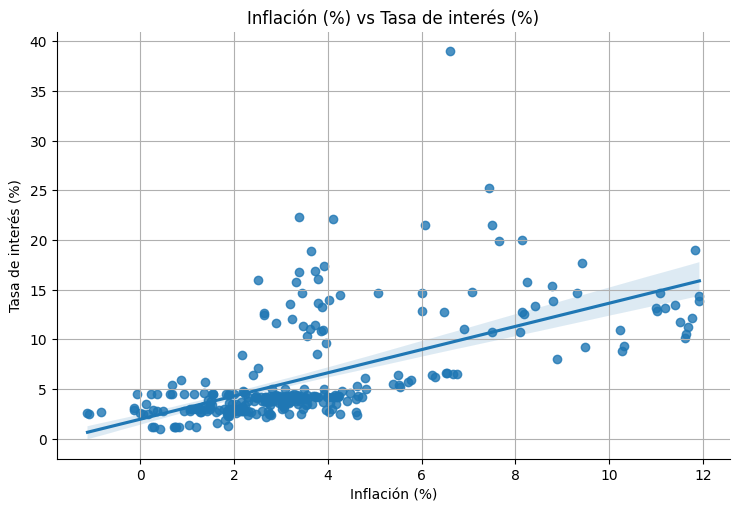

In [ ]:
# 8. Gráfico de dispersión
sns.lmplot(x='Inflación (%)', y='Tasa de interés (%)', data=df_bcrp, aspect=1.5)
plt.title('Inflación (%) vs Tasa de interés (%)')
plt.xlabel('Inflación (%)')
plt.ylabel('Tasa de interés (%)')
plt.grid(True)
plt.show()

###Gráficos de radar: Análisis de variables por años, interpretación de la economía, la inflación y la política monetaria

In [ ]:
#9. Gráfico de radar

# 1. Agregar columna de año y calcular promedios

df_bcrp['Año'] = df_bcrp['Fecha'].dt.year
# Agrupamos por año y calculamos el promedio anual
df_anual = df_bcrp.groupby('Año').mean(numeric_only=True)

# 2.Seleccionar años a mostrar (por ejemplo, 1998, 2001, 2008, 2015, 2019)

años_a_mostrar = [1998, 2001, 2008, 2015, 2019]
df_radar = df_anual.loc[años_a_mostrar]



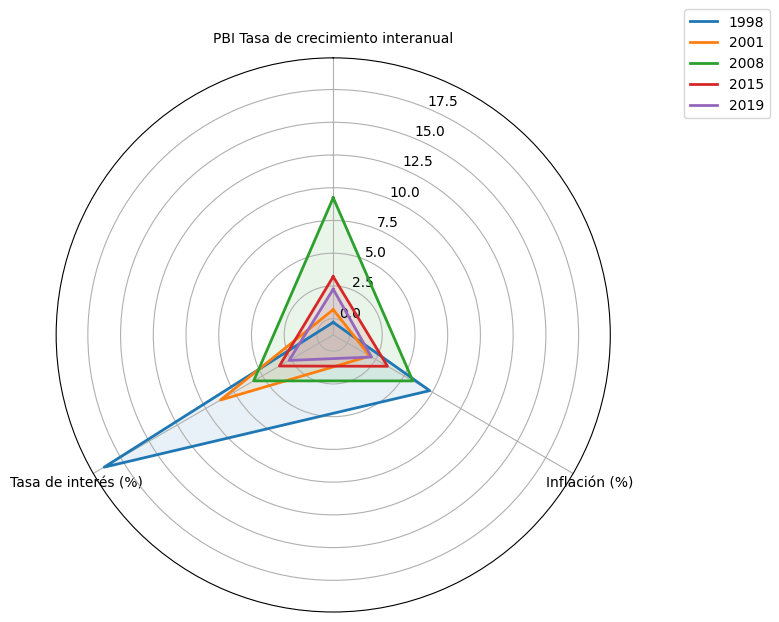

In [ ]:
# 3.Crear gráfico radar

# Variables económicas a mostrar
variables = df_radar.columns.tolist()
num_vars = len(variables)

# Ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores para cada año
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Dibujar cada año
for i, año in enumerate(df_radar.index):
    valores = df_radar.loc[año].tolist()
    valores += valores[:1]  # Cerrar círculo
    ax.plot(angles, valores, label=str(año), linewidth=2, color=colores[i])
    ax.fill(angles, valores, alpha=0.1, color=colores[i])

# Configuración del gráfico
ax.set_title("", size=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), variables)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

Cada línea representa un año, y el área cubierta refleja el perfil económico:

Un año con alta inflación y bajo crecimiento se verá diferente a uno con tasas de interés altas y crecimiento fuerte.

Puedes detectar crisis, estabilidad o recuperación económica.

**Año 1998: Alta tasa de interés, inflación elevada y recesión**

*   La tasa de interés promedio fue la mayor de todos los años, siendo superior al 17.5%, con una inflación promedio del 7.5%, mayor al resto de años. Con un crecimiento negativo.

    CONTEXTO:
  *   En 1998, Perú sufrió los efectos del fenómeno de El Niño y la crisis financiera internacional derivada de Asia y Rusia.

    ANÁILISIS:
  *   La política monetaria fue restrictiva: el BCRP elevó fuertemente la tasa de interés para contener la presión inflacionaria y la salida de capitales.

  *   Una PMC (eleva la tasa de interés) reduce la inversión y el consumo, generando contracción del producto. Además, las expectativas inflacionarias aumentaron por el shock externo (precios de alimentos), lo que empujó la inflación a más del 7%.


**Año 2001: Reactivación con baja inflación y reducción de tasa**

*   El crecimiento se volvió positivo y la inflación se redujo a menos del 2.5%, la tasa de interés fue mayor del 7.5%.

    CONTEXTO:
  *   Fue un año de transición política y recuperación tras la crisis de finales de los 90. La inflación cayó drásticamente, reflejando la credibilidad del régimen de metas explícitas de inflación, iniciado en 2002 formalmente.

    ANÁLISIS:
  *   Si el banco central logra anclar las expectativas inflacionarias, puede permitir una política monetaria más laxa sin perder control de precios. (Mishkin - PM)

  *   El crecimiento vuelve a ser positivo gracias al impulso fiscal, mejora de confianza y contexto internacional más estable.

**Año 2008: Boom económico con inflación y tasas moderadas**

*   Es el año con mayor crecimiento, llegando a una tasa promedio de casi 10%, las tasas de inflación y de interés son parecidas y poco mayores al 5%.

    CONTEXTO:
  *   Fue el pico del superciclo de materias primas, con China demandando fuertemente cobre y metales, y Perú creciendo cerca del 10%.
  *   A pesar del crecimiento acelerado, la inflación y la tasa de interés se mantuvieron bajo control.

    ANÁLISIS:
  *   Un aumento en la demanda externa impulsa las exportaciones netas, aumentan los ingresos, incrementa la demanda agregada y su acelera el crecimiento. (Romer-Advanced Macroeconomics).
  *   El BCRP respondió prudentemente, subiendo tasas gradualmente (PMC) para evitar un sobrecalentamiento sin frenar el crecimiento.


**Año 2015: Crecimiento moderado con tasas bajas**

*   El crecimiento se redujo a poco más del 2.5%, la tasa de interés y de inflación también tienen ese porcentaje.

    CONTEXTO:
  *   Después del fin del boom de commodities, el crecimiento se desacelera y la política monetaria se vuelve más moderada para expandir el producto sin generar presiones inflacionarias. La inflación y la tasa de interés se mantuvieron en torno al 2.5%, dentro del rango meta.

    ANALISIS:
  *   Una caída en la inversión o en las exportaciones puede reducir el crecimiento.
  *   El BCRP mantiene tasas moderadas para estimular la economía, sin generar presiones inflacionarias significativas.



**Año 2019: Estabilidad macroeconómica, inflación controlada y tasas bajas**

*   La tasa de inflación se mantuvo respecto al año 2014, mientras que la tasa de interés alcanzó a ser mayor al 2.5% y el crecimiento fue positivoy moderado de 2.5%.

    CONTEXTO:

  *   A pesar de baja inflación, el BCRP no redujo agresivamente la tasa de interés por factores de riesgo internacional (guerra comercial China-EEUU) y tensiones políticas internas.

    ANALISIS:
  *    En un contexto de estabilidad macroeconómica, con inflación controlada y crecimiento moderado, las tasas bajas son consistentes con una política acomodaticia pero cauta. Esto corresponde al escenario de equilibrio descrito en la transición a ciclos normales según Blanchard, donde el objetivo es mantener la estabilidad sin generar desequilibrios.





In [ ]:
# Escalando

scaler = MinMaxScaler()
df_radar_scaled = pd.DataFrame(
    scaler.fit_transform(df_radar),
    index=df_radar.index,
    columns=df_radar.columns
)

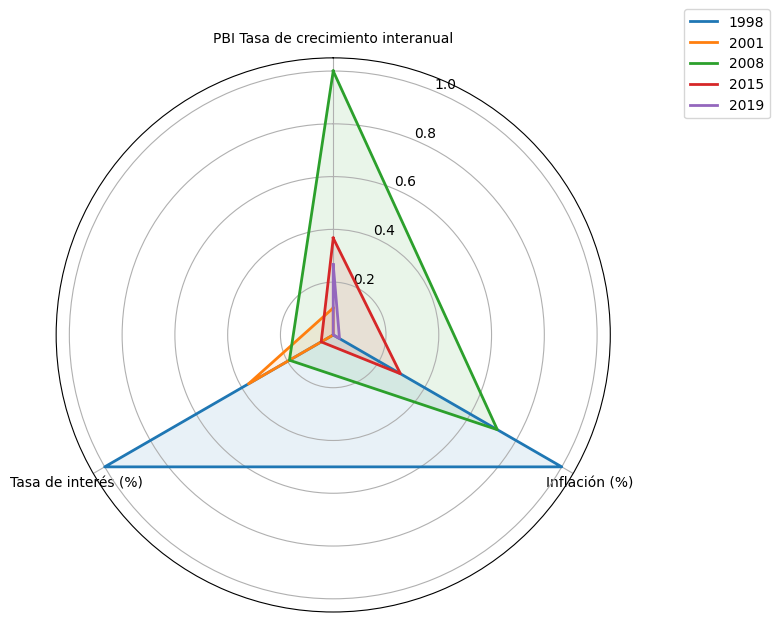

In [ ]:
# 3.Crear gráfico radar

# Variables económicas a mostrar
variables = df_radar_scaled.columns.tolist()
num_vars = len(variables)

# Ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Colores para cada año
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Dibujar cada año
for i, año in enumerate(df_radar_scaled.index):
    valores = df_radar_scaled.loc[año].tolist()
    valores += valores[:1]  # Cerrar círculo
    ax.plot(angles, valores, label=str(año), linewidth=2, color=colores[i])
    ax.fill(angles, valores, alpha=0.1, color=colores[i])

# Configuración del gráfico
ax.set_title("", size=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), variables)
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

| Valor reescalado | Interpretación relativa dentro del conjunto de datos                |
| ---------------- | ------------------------------------------------------------------- |
| **≈ 1.0**        | Fue el **valor más alto** de esa variable en los años seleccionados |
| **≈ 0.0**        | Fue el **valor más bajo** de esa variable                           |
| **≈ 0.5**        | Está **en la media** o nivel medio comparado a otros años           |


#ECONOMETRÍA DE SERIES DE TIEMPO

##ESTACIONARIEDAD

**1. Estacionariedad en sentido débil (Weak stationarity o covariance stationarity)**

Definición formal (según Hamilton, Lütkepohl y Enders):

Una serie de tiempo $y_{t}$ es débilmente estacionaria si cumple:

  1. $E(y_{t}) = \mu$ , una constante (la media es constante en el tiempo).
  2. $\text{Var}(y_{t}) = \sigma^2$, una constante (la varianza es constante en el tiempo).
  3. $\text{Cov}(y_{t}, y_{t+h}) = \gamma(h)$, depende solo de la distancia ℎ (rezago), no del tiempo 𝑡.

Ninguno de estos momentos cambian en el tiempo.

**2. Estacionariedad en sentido fuerte (Strong stationarity)**

Definición formal:
Una serie $y_{t}$ es fuertemente estacionaria si la distribución conjunta de $(y_{t}, y_{t+1}, \dots, y_{t+k})$ es invariante al desplazamiento temporal.

Esto significa que para todo 𝑘, 𝑡, y cualquier desplazamiento ℎ:

$$
(y_{t}, y_{t+1}, \dots, y_{t+k}) \overset{d}{=} (y_{t+h}, y_{t+1+h}, \dots, y_{t+k+h})
$$

Es decir, que todas las propiedades estadísticas (no solo las primeras dos o tres) permanecen constantes en el tiempo.




| Propiedad                             | Estacionariedad débil | Estacionariedad fuerte |
| ------------------------------------- | --------------------- | ---------------------- |
| Exige media constante                 | ✅                     | ✅                      |
| Exige varianza constante              | ✅                     | ✅                      |
| Exige autocovarianza constante        | ✅                     | ✅                      |
| Exige distribución completa constante | ❌                     | ✅                      |
| Uso común en econometría              | ✅ (más práctica)      | Menos frecuente        |

*   La mayoría de los modelos econométricos (VAR, VECM, ARIMA) requieren solo estacionariedad en sentido débil.

*   Tests como ADF o KPSS evalúan la estacionariedad débil, ya que es más verificable empíricamente

*   Una serie con saltos estructurales o heterocedasticidad puede no ser fuertemente estacionaria, aunque sí lo sea en sentido débil.

###Análisis Gráfico

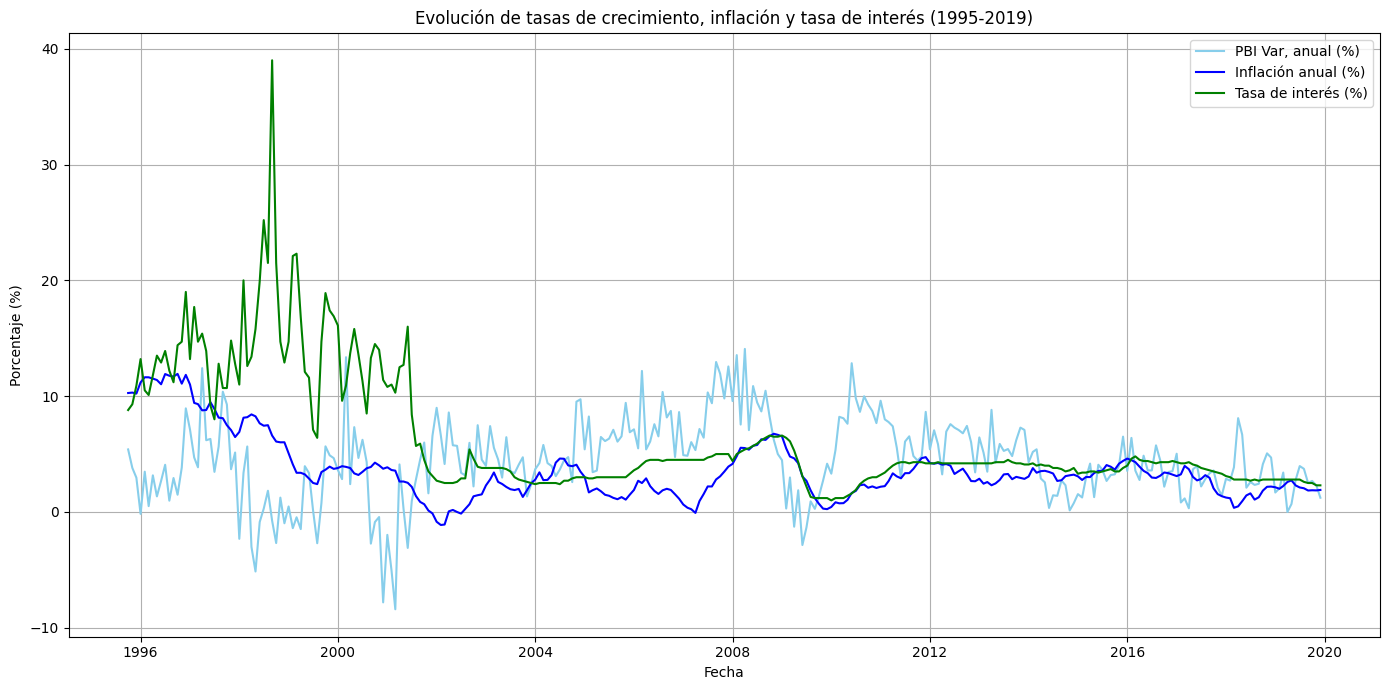

In [ ]:
# 3. Graficar las 3 tasas para comparar el comportamiento
plt.figure(figsize=(14, 7))

plt.plot(df_bcrp['Fecha'], df_bcrp['PBI Tasa de crecimiento interanual'], label='PBI Var, anual (%)', color='skyblue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Inflación (%)'], label='Inflación anual (%)', color='blue')
plt.plot(df_bcrp['Fecha'], df_bcrp['Tasa de interés (%)'], label='Tasa de interés (%)', color='green')

plt.title('Evolución de tasas de crecimiento, inflación y tasa de interés (1995-2019)')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

*   Visualmente la inflación anual (%) es la serie con la mayor estabilidad a lo largo del tiempo, aunque hubo algo más de volatilidad en los primeros años de 1995 al 2001.
*   La tasa de crecimiento anual del PBI (%) tiene una alta volatilidad entre 1995 al año 2000, luego la volatilidad se estabiliza.
*   La tasa de interés fluctua de manera irregular y su volatilidad es muy alta en periodos de crisis.

Por lo tanto, de las 3 series la que parece acercarde a un comportamiento estacionario débil es la inflación, excepto por los primeros años.

    TASA DE INFLACIÓN:
  *   Enders (2015) también destaca que las series inflacionarias pueden comportarse como I(0) en regímenes estables con metas de inflación.
  *   Probablemente débilmente estacionaria a partir de 2002, pero posiblemente no estacionaria (o con cambio estructural) en los 90s.
    
    TASA DE CRECIMIENTO DEL PBI:
  *   Puede tratarse de un proceso con cambio estructural, lo cual violaría la hipótesis de estacionariedad débil (Hamilton, cap. 6).
  *   Según Enders y Lütkepohl, las tasas de crecimiento suelen ser estacionarias si el nivel del PBI es I(1).
  *   No estacionaria en sentido débil. Posible I(1) con cambio estructural.

    TASA DE INTERÉS:
  *   Si la serie muestra saltos abruptos en media/varianza (como en crisis), puede ser no estacionaria o tener volatilidad condicional (ej. procesos ARCH/GARCH).
  *   Hay evidencia de volatilidad cambiante, por lo que requeriría un test adicional (ADF o ARCH test).




| Variable           | Tipo de estacionariedad visual                   | Recomendación según teoría                         | Referencia clave               |
| ------------------ | ------------------------------------------------ | -------------------------------------------------- | ------------------------------ |
| Inflación          | Débilmente estacionaria (I(0)) desde 2002        | Test ADF / KPSS por posibles cambios estructurales | Enders (2015), Hamilton (1994), Mishkin (para teoría) |
| PBI (var. anual %)    | No estacionaria (posible I(1))                   | Test ADF, Zivot-Andrews por cambio estructural     | Lütkepohl (2005), Enders(2015)           |
| Tasa de interés | Dudosa, posible I(0) pero con heterocedasticidad | Test ADF + ARCH test                               | Hamilton (1994), Stock & Watson (2015)       |


###Correlograma

Para analizar la estacionariedad y la estructura temporal de tus series de tiempo, uno de los primeros pasos recomendados por textos como Hamilton (1994) y Enders (2015) es examinar los correlogramas:

*   FAC (Función de Autocorrelación): mide la correlación entre
$y_{t}$ y sus rezagos.

*   FACP (Función de Autocorrelación Parcial): mide la correlación entre $y_{t}$ y $y_{t-k}$ eliminando el efecto de los rezagos intermedios.



Según Enders (2015):

| Tipo de serie          | FAC                                | FACP                       |
| ---------------------- | ---------------------------------- | -------------------------- |
| Estacionaria (AR)      | Disminuye rápidamente              | Corte abrupto en algún lag |
| No estacionaria (I(1)) | FAC persiste alta por mucho tiempo | Disminuye lentamente       |
| MA(q)                  | Corte en FAC                       | Disminuye lentamente       |


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

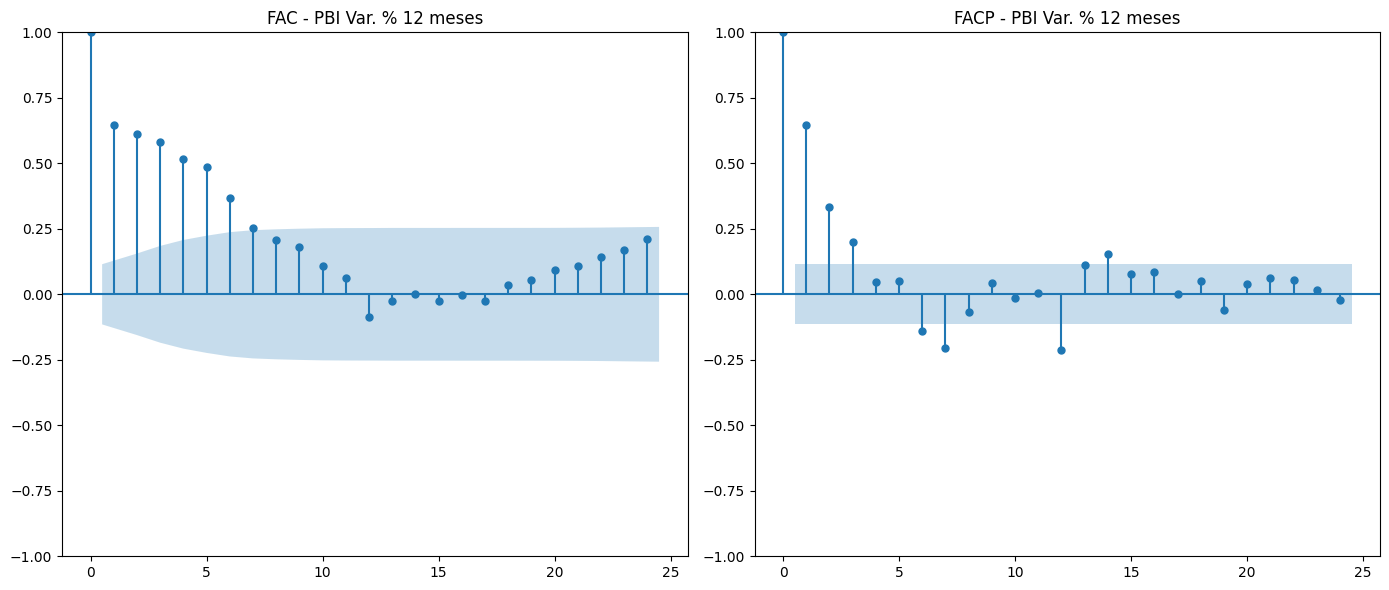

In [ ]:
pbi_fac_facp = df_bcrp['PBI Tasa de crecimiento interanual'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(pbi_fac_facp, lags=24, ax=plt.gca(), title='FAC - PBI Var. % 12 meses')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(pbi_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - PBI Var. % 12 meses')

plt.tight_layout()
plt.show()


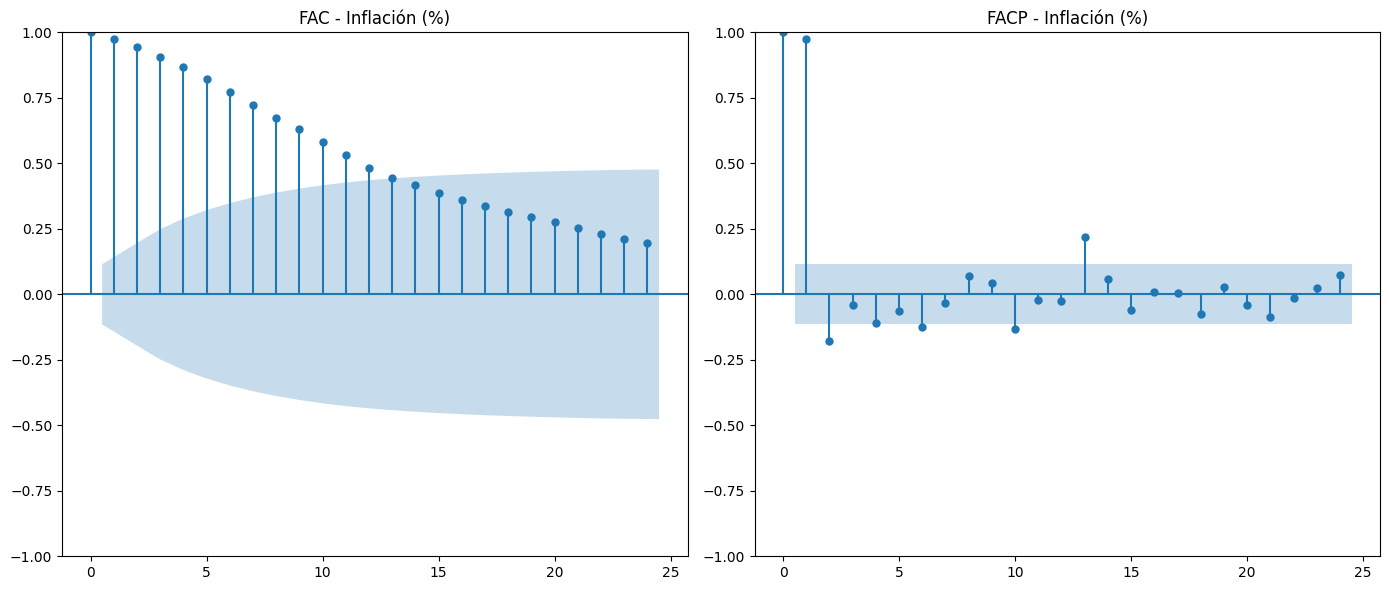

In [ ]:
inf_fac_facp = df_bcrp['Inflación (%)'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(inf_fac_facp, lags=24, ax=plt.gca(), title='FAC - Inflación (%)')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(inf_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - Inflación (%)')

plt.tight_layout()
plt.show()

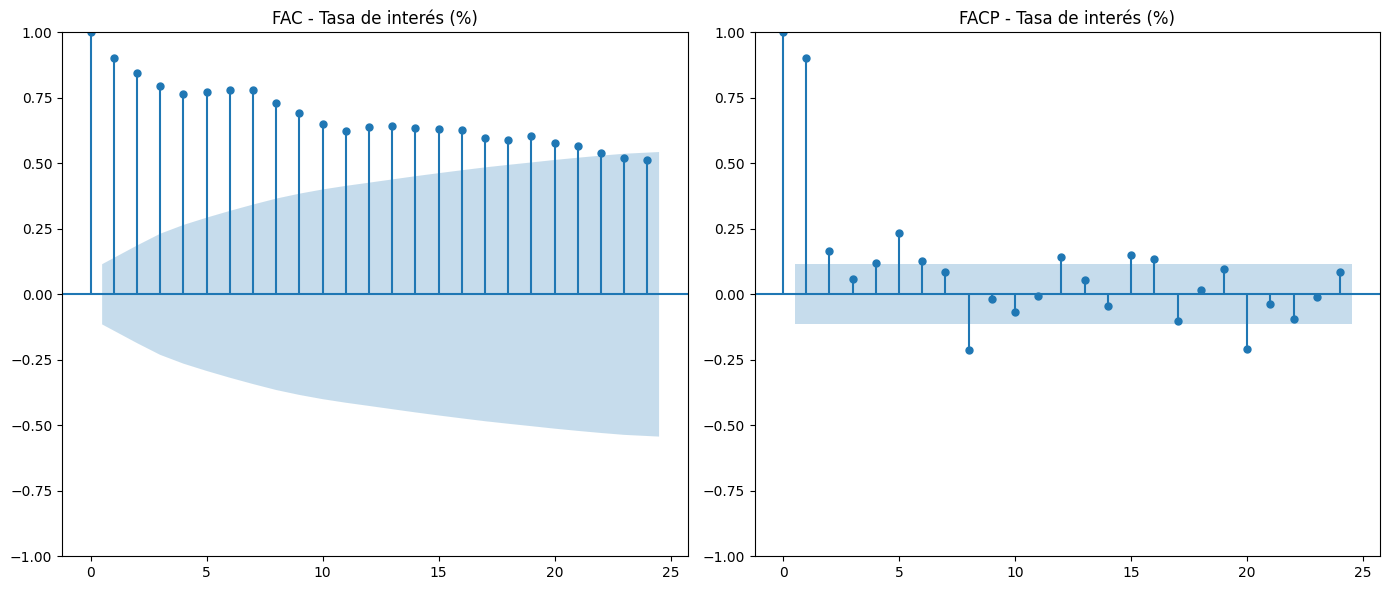

In [ ]:
tii_fac_facp = df_bcrp['Tasa de interés (%)'].dropna()
plt.figure(figsize=(14, 6))

# Correlograma - FAC
plt.subplot(1, 2, 1)
plot_acf(tii_fac_facp, lags=24, ax=plt.gca(), title='FAC - Tasa de interés (%)')

# Correlograma parcial - FACP
plt.subplot(1, 2, 2)
plot_pacf(tii_fac_facp, lags=24, ax=plt.gca(), method='ywm', title='FACP - Tasa de interés (%)')

plt.tight_layout()
plt.show()

###Prueba ADF

**1. Prueba de Dickey-Fuller**

La prueba de Dickey-Fuller evalúa si una serie temporal es no estacionaria debido a la presencia de una raíz unitaria.

Se evalúa si el proceso sigue un camino aleatorio (random walk) o es estacionario.

**Modelo de base:**

Supón un proceso autorregresivo de orden 1:
$$y_{t} = \rho y_{t-1} + \varepsilon_{t}$$

Restando $y_{t-1}$ a ambos lados:
$$\Delta y_{t} = (\rho - 1) y_{t-1} + \varepsilon_{t} = \delta y_{t-1} + \varepsilon_{t}$$

Donde: $\delta= \rho -1$

**Hipótesis:**

*   $H_0 : \delta = 0 \;\; \Rightarrow \;\; \rho = 1$ (raiz unitaria - No estacionaria)
*   $H_1 : \delta < 0 \;\; \Rightarrow \;\; \rho < 1$ (Estacionaria)

**Problema: autocorrelación en los residuos**

Si $\varepsilon_{t}$ está autocorrelado, la prueba DF pierde validez. Por eso se aumenta el modelo incluyendo rezagos de $\Delta y_{t}$



**3. Modelo Aumentado: ADF**

$$\Delta y_t = \alpha + \beta t + \delta y_{t-1} + \sum_{i=1}^{p} \gamma_i \Delta y_{t-i} + \varepsilon_t$$

*   $\alpha$ : constante (drift)
*   $\beta t$ : tendencia determinista
*   $\delta$ : coeficiente clave que prueba si hay raíz unitaria
*   $\sum_{i=1}^{p} \gamma_i \Delta y_{t-i}$ : corrección por autocorrelación








**4. Versiones del test ADF**

| Regresión | Incluye            | Forma                                        | Interpretación                        |
| --------- | ------------------ | -------------------------------------------- | ------------------------------------- |
| `'n'`     | Nada               | $\Delta y_t = \delta y_{t-1} + \ldots$       | Serie estacionaria en torno a 0       |
| `'c'`     | Constante          | $\alpha + \delta y_{t-1} + \ldots$           | Estacionaria en torno a una media     |
| `'ct'`    | Constante + trend  | $\alpha + \beta t + \delta y_{t-1} + \ldots$ | Estacionaria en torno a una tendencia |
| `'ctt'`   | También cuadrática | Poco usada                                   | Muy restrictiva, rara vez se usa      |

Hamilton y Lütkepohl recomiendan usar la forma más completa posible (con constante y tendencia) al testear.

**5. Estadístico ADF**

*   Se estima la regresión por MCO.
*   Se obtiene el estadístico $\tau$ para $\delta$ (el coeficiente de $y_{t-1}$).
*   Se compara con valores críticos de Dickey-Fuller (no siguen distribución t estándar).

**6. Selección de rezagos $\rho$**

Se selecciona para evitar autocorrelación en residuos (criterios AIC, BIC o pruebas de Ljung-Box).

**7. Resultado e interpretación**

*   Si p-valor < 0.05, rechazas H₀ → Serie estacionaria.
*   Si p-valor > 0.05, no rechazas H₀ → Serie no estacionaria.


¿Qué variantes de la ADF existen?

En base a los textos como Hamilton, Enders, y Lütkepohl, las versiones típicas son:

1.   Sin constante ni tendencia → prueba de estacionariedad en torno a 0.
2.   Con constante → prueba de estacionariedad en torno a una media constante.
3.   Con constante y tendencia lineal → prueba de estacionariedad en torno a una tendencia determinista.
4.   Con rezagos (AR) → para controlar autocorrelación de los residuos.





In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.tsatools import add_trend
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

In [ ]:
def prueba_adf_completa(serie, nombre, max_lags=12, criterio='aic'):
    versiones = {
        'N (sin constante ni tendencia)': 'n',
        'C (con constante)': 'c',
        'CT (constante y tendencia)': 'ct'
    }

    print(f"\n{'='*70}")
    print(f"📊 Prueba ADF para: {nombre}")
    print(f"{'='*70}")

    for etiqueta, reg in versiones.items():
        print(f"\n🔸 {etiqueta}")

        serie_limpia = serie.dropna()
        resultado = adfuller(serie_limpia, maxlag=max_lags, regression=reg, autolag=criterio)

        adf_stat = resultado[0]
        p_value = resultado[1]
        used_lag = resultado[2]
        n_obs = resultado[3]
        crit_values = resultado[4]

        print(f"   ADF = {adf_stat:.4f} | p-value = {p_value:.4f}")
        print(f"   Lags usados: {used_lag} | Observaciones: {n_obs}")
        print("   Valores críticos:")
        for nivel, valor in crit_values.items():
            print(f"      {nivel}% ⇒ {valor:.4f}")

        # Prueba Ljung-Box para residuos
        y = serie_limpia.values
        y_diff = pd.Series(np.diff(y), name='dy').dropna()
        resid = y_diff[used_lag:] - y_diff.shift(1)[used_lag:]
        resid = resid.dropna()

        lb_test = acorr_ljungbox(resid, lags=[min(used_lag, 10)], return_df=True)
        lb_stat = lb_test.iloc[0, 0]
        lb_pval = lb_test.iloc[0, 1]
        print(f"   Ljung-Box (lag {min(used_lag, 10)}): stat = {lb_stat:.2f}, p = {lb_pval:.4f}")

        if p_value < 0.05:
            print(f"   ✅ Estacionaria (se rechaza H₀)")
        else:
            print(f"   ⛔ No estacionaria (no se rechaza H₀)")

In [ ]:
# 🧪 Ejecutar pruebas para tus columnas:
columnas = [
    'PBI Tasa de crecimiento interanual',
    'Inflación (%)',
    'Tasa de interés (%)'
]

In [ ]:
for col in columnas:
    prueba_adf_completa(df_bcrp[col], col)


📊 Prueba ADF para: PBI Tasa de crecimiento interanual

🔸 N (sin constante ni tendencia)
   ADF = -1.8121 | p-value = 0.0666
   Lags usados: 12 | Observaciones: 278
   Valores críticos:
      1%% ⇒ -2.5738
      5%% ⇒ -1.9420
      10%% ⇒ -1.6159
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ⛔ No estacionaria (no se rechaza H₀)

🔸 C (con constante)
   ADF = -4.0836 | p-value = 0.0010
   Lags usados: 12 | Observaciones: 278
   Valores críticos:
      1%% ⇒ -3.4541
      5%% ⇒ -2.8720
      10%% ⇒ -2.5723
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ✅ Estacionaria (se rechaza H₀)

🔸 CT (constante y tendencia)
   ADF = -4.0479 | p-value = 0.0075
   Lags usados: 12 | Observaciones: 278
   Valores críticos:
      1%% ⇒ -3.9917
      5%% ⇒ -3.4264
      10%% ⇒ -3.1364
   Ljung-Box (lag 10): stat = 133.78, p = 0.0000
   ✅ Estacionaria (se rechaza H₀)

📊 Prueba ADF para: Inflación (%)

🔸 N (sin constante ni tendencia)
   ADF = -3.2982 | p-value = 0.0010
   Lags usados: 12 | Observ

**Interpretación de resultados**



1.   PBI

  SIN TENDENCIA Y SIN DRIFT
  *   Modelo sin tendencia y sin drift (constante): Según Enders (2014), esta especificación se usa cuando se espera que la serie fluctúe alrededor de cero sin tendencia ni nivel constante.
  *   Estadístico ADF: -1.8121, Este es el valor calculado para el estadístico τ de Dickey-Fuller. Se debe comparar con los valores críticos para decidir si se rechaza la hipótesis nula (no estacionariedad).
  *   p-value: 0.0666, es la probabilidad de obtener un estadístico igual o más extremo que el observado si la hipótesis nula es verdadera. Aquí: p ≈ 0.067 → mayor que 0.05, por tanto, no rechazamos H₀ al 5%. ***Conclusión***: no hay evidencia suficiente para decir que la serie es estacionaria.
  *   Lags usados: 12, Se usaron 12 rezagos en el modelo ADF para capturar la autocorrelación de orden superior y evitar errores de especificación. Hamilton (1994) y Lütkepohl (2005) recomiendan seleccionar el número óptimo de rezagos por criterios como AIC, BIC o pruebas Ljung-Box.
  *   Observaciones: 278, Es el número de observaciones efectivamente usadas tras considerar los rezagos (es decir, datos totales menos los primeros 12).
  *   Valores críticos: 1% ⇒ -2.5738, 5% ⇒ -1.9420, 10% ⇒ -1.6159, El estadístico ADF debe ser más negativo que estos valores para rechazar H₀. En este caso ADF=-1.8121 está entre -1.942 y -1.615, No supera el umbral del 5% ni del 1%, solo estaría cerca al 10%.
  *   Ljung-Box (lag 10): stat = 133.78, p = 0.0000, Esta es una prueba de autocorrelación de los residuos. H₀: los residuos son ruido blanco (sin autocorrelación). p = 0.0000 indica autocorrelación presente ⇒ los residuos del modelo ADF no son ruido blanco. Esto puede sugerir: Que se necesitan más rezagos en el modelo ADF, o que el modelo está mal especificado (quizás necesita incluir constante o tendencia).



2.   PBI

  CON DRIFT, SIN TENDENCIA

    *   Modelo con drift (constante): Según Hamilton (1994) y Enders (2014), este modelo es adecuado cuando la serie puede tener una media distinta de cero, pero no muestra tendencia determinista.
    *   El valor del estadístico ADF (-4.0836) es más negativo que todos los valores críticos (1%, 5%, 10%).
    *   El p-value = 0.0010 es menor que 0.05, por lo que rechazamos la hipótesis nula (H₀) de raíz unitaria.
    *   ***Conclusión***: La serie es estacionaria en media, es decir, fluctúa alrededor de una constante, sin tendencia determinista.
    *   El p-valor = 0.0000, indica presencia de autocorrelación en los residuos del modelo ADF. Según Lütkepohl (2005) y Greene (2012), esto sugiere que: El modelo podría necesitar más rezagos o una mejor especificación (aunque usaste 12), Si el objetivo fuera modelar dinámicamente (por ejemplo, en un ARIMA), esta autocorrelación sería un problema.
    *   Esto concuerda con la literatura macroeconómica que considera que las tasas de crecimiento suelen revertir a un valor promedio de largo plazo.





3.   PBI

  CON DRIFT Y CON TENDENCIA

  *   Modelo con constante y tendencia lineal:Enders (2014), Hamilton (1994), Lütkepohl (2005) Este modelo es útil cuando: La serie tiene una media no constante y existe una posible tendencia determinista (lineal).
  *   El estadístico ADF -4.0479 es más negativo que los valores críticos en todos los niveles de significancia.
  *   El p-value es 0.0075, menor a 0.01, 0.05 y 0.10. Rechazamos la hipótesis nula de raíz unitaria ⇒ La serie es estacionaria aun teniendo en cuenta una tendencia lineal determinista.
  *   Ljung-Box sobre los residuos, el valor p del test de Ljung-Box = 0.0000 → indica que los residuos tienen autocorrelación significativa. Esto implica que el modelo ADF puede estar mal especificado (quizá más rezagos o incluir otras variables).
  *   Cualquier tendencia observada no es lo suficientemente fuerte como para invalidar la reversión a una media/tendencia estable.
  *   Las fluctuaciones del crecimiento del PBI en el Perú tienden a mantenerse en torno a un camino estable en el largo plazo, aún cuando hay ciclos o shocks transitorios. Esto es coherente con modelos de ciclos económicos reales, donde el crecimiento puede desviarse temporalmente, pero retorna a su sendero de equilibrio de largo plazo.








4.   INFLACIÓN

  SIN CONSTANTE, NI TENDENCIA
  *   El estadístico ADF es más negativo que los tres valores críticos, y el p-value es muy bajo →
Rechazamos H₀ ⇒ la serie es estacionaria, aun sin constante ni tendencia.
  *   Esto sugiere que la inflación oscila alrededor de cero, y no hay evidencia de media distinta de cero ni de tendencia determinista. (Ver: Enders, Applied Econometric Time Series, cap. 4)

  CON CONSTANTE, SIN TENDENCIA
  *   Nuevamente, el estadístico ADF es más negativo que todos los valores críticos.
Rechazamos H₀ ⇒ la serie es estacionaria alrededor de una media constante distinta de cero.
  *   Esto es consistente con un comportamiento donde la inflación fluctúa alrededor de una media estable en el tiempo, sin tendencia determinista. (Hamilton, Time Series Analysis, sección 17.3)

  CON CONSTANTE, CON TENDENCIA
  *   El estadístico ADF es menor que los valores críticos del 1% y 5%, pero no suficiente para rechazarlos.
Solo se ubica por debajo del 10%.
Por lo tanto, no se rechaza H₀ ⇒ no se concluye que sea estacionaria en presencia de una tendencia determinista.
  *   Esto indica que, si asumimos que la inflación sigue una tendencia lineal a largo plazo, no podemos confirmar su estacionariedad.

  Ljung-Box
  *   En todos los casos, el p-value del test de Ljung-Box es 0.0000 → indica autocorrelación significativa en los residuos. Esto sugiere que los rezagos incluidos (lags=12) no eliminaron completamente la dinámica temporal, lo cual debe tomarse en cuenta al modelar (por ejemplo, puede preferirse usar más rezagos o modelos VAR).
  







5.   TASA DE INTERÉS

  SIN CONSTANTE, NI TENDENCIA
  *   El estadístico está entre los valores críticos del 5% y 10%, pero el p-value > 0.05, por lo tanto: No se rechaza H₀ → la serie tiene raíz unitaria y no es estacionaria en nivel.
  *   Asumir que la serie fluctúa alrededor de cero no mejora la potencia del test. Posiblemente tiene una media distinta de cero o alguna tendencia.

  CON CONSTANTE, SIN TENDENCIA
  *   El estadístico está muy por encima de los valores críticos → no se rechaza H₀.
  *   No hay evidencia de que la tasa de interés se mantenga estable alrededor de una media constante. Indica posible presencia de raíz unitaria.

  CON CONSTANTE Y CON TENDENCIA
  *   El estadístico es mucho más alto que los valores críticos → nuevamente, no se rechaza H₀.
  *   Aunque se incluye una tendencia lineal determinista, no se encuentra evidencia de reversión a dicha tendencia.

  TEST LJUNG-BOX(LAG 7)
  *   Stat = 122.90, p-value = 0.0000, que indica autocorrelación significativa en los residuos.
  *   Implica que la dinámica temporal no se ha captado completamente con los lags utilizados (aquí 7).

  CONCLUSIÓN
  *   Según Hamilton (1994) y Enders (2015), cuando ninguna especificación del test ADF permite rechazar la hipótesis nula de raíz unitaria, se concluye que la serie no es estacionaria en nivel.
  *   La serie de tasa de interés interbancaria promedio en MN requiere diferenciación para lograr estacionariedad. También es importante considerar su transformación logarítmica o tasas de variación, dependiendo del análisis económico que se quiere realizar (por ejemplo, con modelos VAR o VECM más adelante).


